In [1]:
#!pip install mlflow

Verificar si Mlflow está instalado

In [2]:
pip show mlflow

Name: mlflow
Version: 2.22.0
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: https://mlflow.org
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.

                                Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the

In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import  PowerTransformer
pt_yj = PowerTransformer(method='yeo-johnson')

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.decomposition import PCA

import math
import warnings
warnings.filterwarnings('ignore')

import mlflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("TOYOTA_COROLLA_PARCIAL")
mlflow.autolog()

2025/05/30 14:11:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/30 14:11:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


# Análisis Exploratorio de Datos

Importar Dataset y ver dimensiones del dataset crudo

In [4]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv")

print(f'Dimensiones del dataset: {df_raw.shape}')

Dimensiones del dataset: (1436, 37)


Visualizar columnas del dataset

In [5]:
df_raw.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

Ver informacion y tipo de dato de cada columna

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

Convertimos los nombres de las columnas a minúscula

In [7]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'cylinders',
       'gears', 'quarterly_tax', 'weight', 'mfr_guarantee', 'bovag_guarantee',
       'guarantee_period', 'abs', 'airbag_1', 'airbag_2', 'airco',
       'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
       'powered_windows', 'power_steering', 'radio', 'mistlamps',
       'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette',
       'tow_bar'],
      dtype='object')

Realizamos un analisis de la descripción de los datos del dataset

In [8]:
df_raw.describe(include='all').T

count unique  \
id                1436.0    NaN   
model               1436    372   
price             1436.0    NaN   
age_08_04         1436.0    NaN   
mfg_month         1436.0    NaN   
mfg_year          1436.0    NaN   
km                1436.0    NaN   
fuel_type           1436      3   
hp                1436.0    NaN   
met_color         1436.0    NaN   
automatic         1436.0    NaN   
cc                1436.0    NaN   
doors             1436.0    NaN   
cylinders         1436.0    NaN   
gears             1436.0    NaN   
quarterly_tax     1436.0    NaN   
weight            1436.0    NaN   
mfr_guarantee     1436.0    NaN   
bovag_guarantee   1436.0    NaN   
guarantee_period  1436.0    NaN   
abs               1436.0    NaN   
airbag_1          1436.0    NaN   
airbag_2          1436.0    NaN   
airco             1436.0    NaN   
automatic_airco   1436.0    NaN   
boardcomputer     1436.0    NaN   
cd_player         1436.0    NaN   
central_lock      1436.0    NaN   
powered_windows   1436.0    NaN   
power_steering    1436.0    NaN   
radio             1436.0    NaN   
mistlamps         1436.0    NaN   
sport_model       1436.0    NaN   
backseat_divider  1436.0    NaN   
metallic_rim      1436.0    NaN   
radio_cassette    1436.0    NaN   
tow_bar           1436.0    NaN   

                                                                top  freq  \
id                                                              NaN   NaN   
model             TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...   107   
price                                                           NaN   NaN   
age_08_04                                                       NaN   NaN   
mfg_month                                                       NaN   NaN   
mfg_year                                                        NaN   NaN   
km                                                              NaN   NaN   
fuel_type                                                    Petrol  1264   
hp                                                              NaN   NaN   
met_color                                                       NaN   NaN   
automatic                                                       NaN   NaN   
cc                                                              NaN   NaN   
doors                                                           NaN   NaN   
cylinders                                                       NaN   NaN   
gears                                                           NaN   NaN   
quarterly_tax                                                   NaN   NaN   
weight                                                          NaN   NaN   
mfr_guarantee                                                   NaN   NaN   
bovag_guarantee                                                 NaN   NaN   
guarantee_period                                                NaN   NaN   
abs                                                             NaN   NaN   
airbag_1                                                        NaN   NaN   
airbag_2                                                        NaN   NaN   
airco                                                           NaN   NaN   
automatic_airco                                                 NaN   NaN   
boardcomputer                                                   NaN   NaN   
cd_player                                                       NaN   NaN   
central_lock                                                    NaN   NaN   
powered_windows                                                 NaN   NaN   
power_steering                                                  NaN   NaN   
radio                                                           NaN   NaN   
mistlamps                                                       NaN   NaN   
sport_model                                                     NaN   NaN   
backseat_divider                                                NaN   

Eliminamos 3 variables que consideramos que no aportan al modelo:

- **Id:** Eliminamos id porque no aporta nada al modelo.
- **Model:** Eliminamos ya que esta variable aunque contenga informacion, esta ya se encuentra en el dataset y no incluye mas informacion importante.
- **Cylinders:** Eliminamos esta variable el cual contiene valores constantes, no aporta nada al modelo

In [9]:
columns_to_delete = ['id', 'model', 'cylinders']
df = df_raw.drop(columns=columns_to_delete, axis=1)
df = pd.DataFrame(df)

Verificamos que efectivamente hayan sido eliminadas las columnas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1436 non-null   int64 
 1   age_08_04         1436 non-null   int64 
 2   mfg_month         1436 non-null   int64 
 3   mfg_year          1436 non-null   int64 
 4   km                1436 non-null   int64 
 5   fuel_type         1436 non-null   object
 6   hp                1436 non-null   int64 
 7   met_color         1436 non-null   int64 
 8   automatic         1436 non-null   int64 
 9   cc                1436 non-null   int64 
 10  doors             1436 non-null   int64 
 11  gears             1436 non-null   int64 
 12  quarterly_tax     1436 non-null   int64 
 13  weight            1436 non-null   int64 
 14  mfr_guarantee     1436 non-null   int64 
 15  bovag_guarantee   1436 non-null   int64 
 16  guarantee_period  1436 non-null   int64 
 17  abs           

### Buscamos valores nulos y duplicados

In [11]:
df.isnull().sum()

price               0
age_08_04           0
mfg_month           0
mfg_year            0
km                  0
fuel_type           0
hp                  0
met_color           0
automatic           0
cc                  0
doors               0
gears               0
quarterly_tax       0
weight              0
mfr_guarantee       0
bovag_guarantee     0
guarantee_period    0
abs                 0
airbag_1            0
airbag_2            0
airco               0
automatic_airco     0
boardcomputer       0
cd_player           0
central_lock        0
powered_windows     0
power_steering      0
radio               0
mistlamps           0
sport_model         0
backseat_divider    0
metallic_rim        0
radio_cassette      0
tow_bar             0
dtype: int64

In [12]:
df[df.duplicated()]

price  age_08_04  mfg_month  mfg_year     km fuel_type   hp  met_color  \
113  24950          8          1      2004  13253    Diesel  116          1   

     automatic    cc  ...  central_lock  powered_windows  power_steering  \
113          0  2000  ...             1                1               1   

     radio  mistlamps  sport_model  backseat_divider  metallic_rim  \
113      0          0            0                 0             0   

     radio_cassette  tow_bar  
113               0        0  

[1 rows x 34 columns]

Se encontro un registro duplicado, pero consideramos que no genera ningun problema por lo tanto la conservamos

Realizamos la transformacion dummie de la variable fuel_type

In [13]:
#Convierto la variable categorica Fuel_type en variables booleanas
dummies = pd.get_dummies(data=df, columns=['fuel_type'], drop_first=True, prefix="ft_", dtype=int) 
df = dummies

### Visualización de datos
- Histogramas con kde para el analisis de la simetria
- Boxplot para el analisis de outliers 
- Matriz de correlacion para el analisis de las relaciones

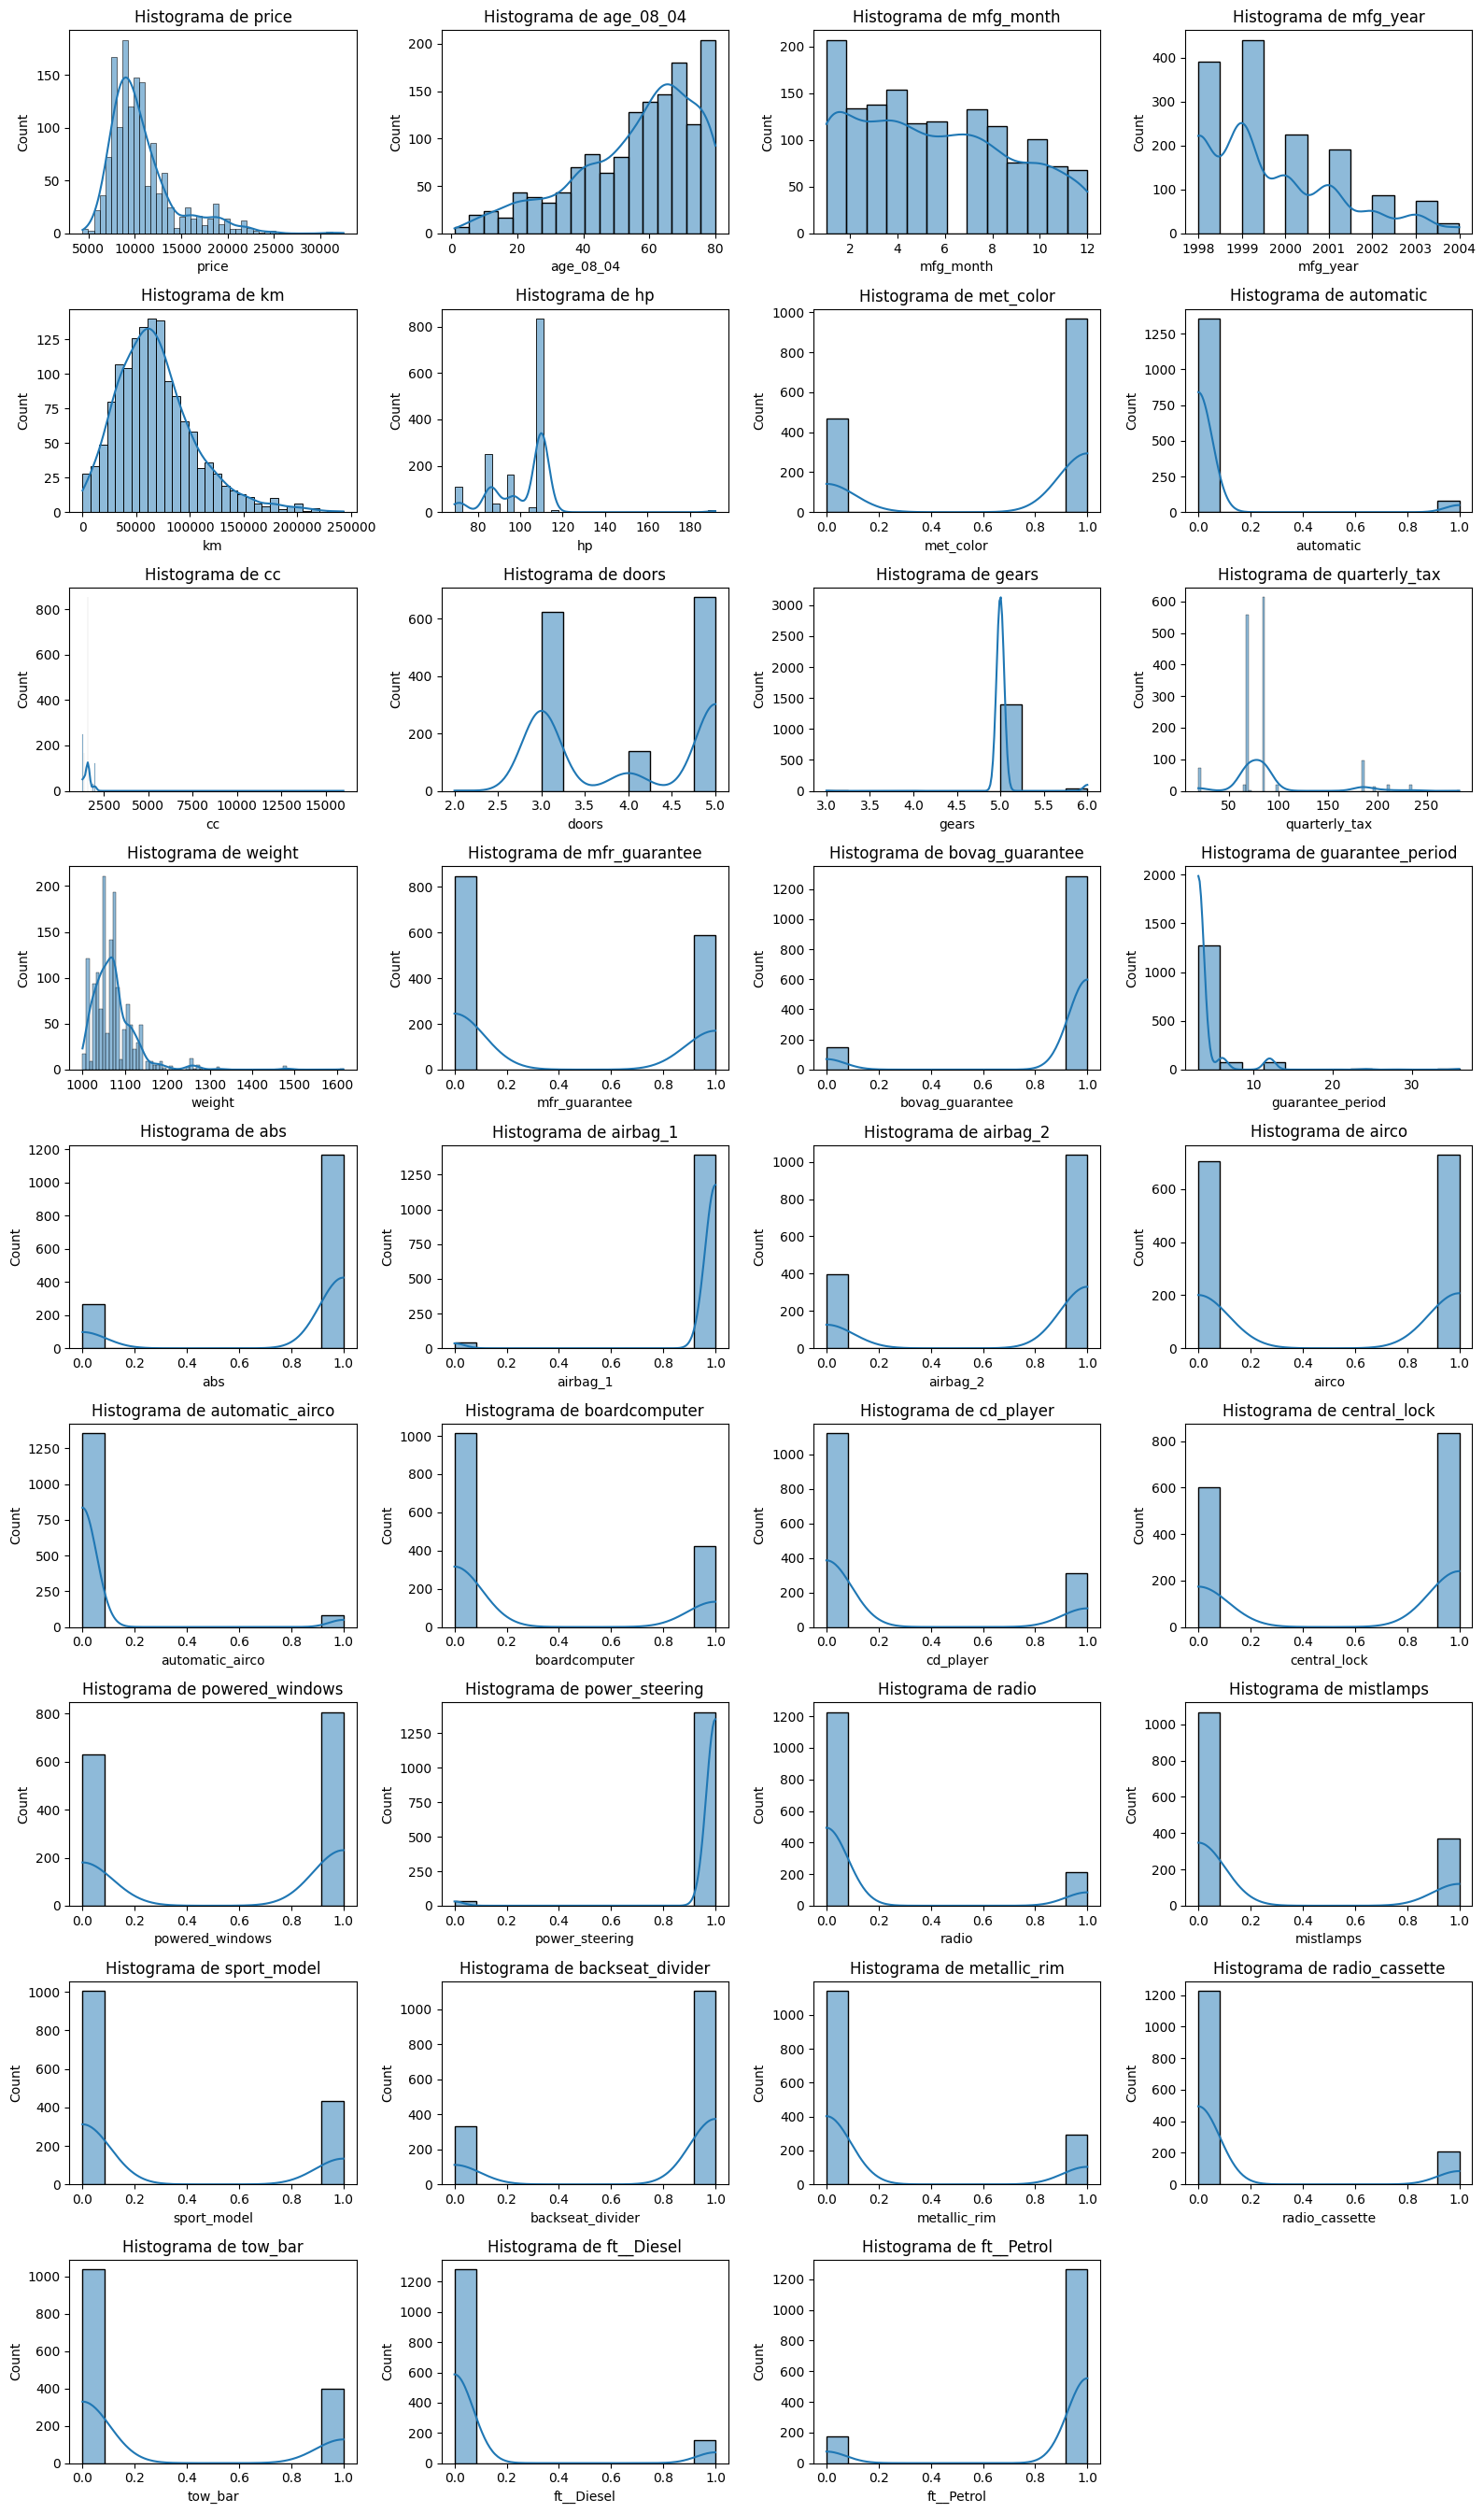

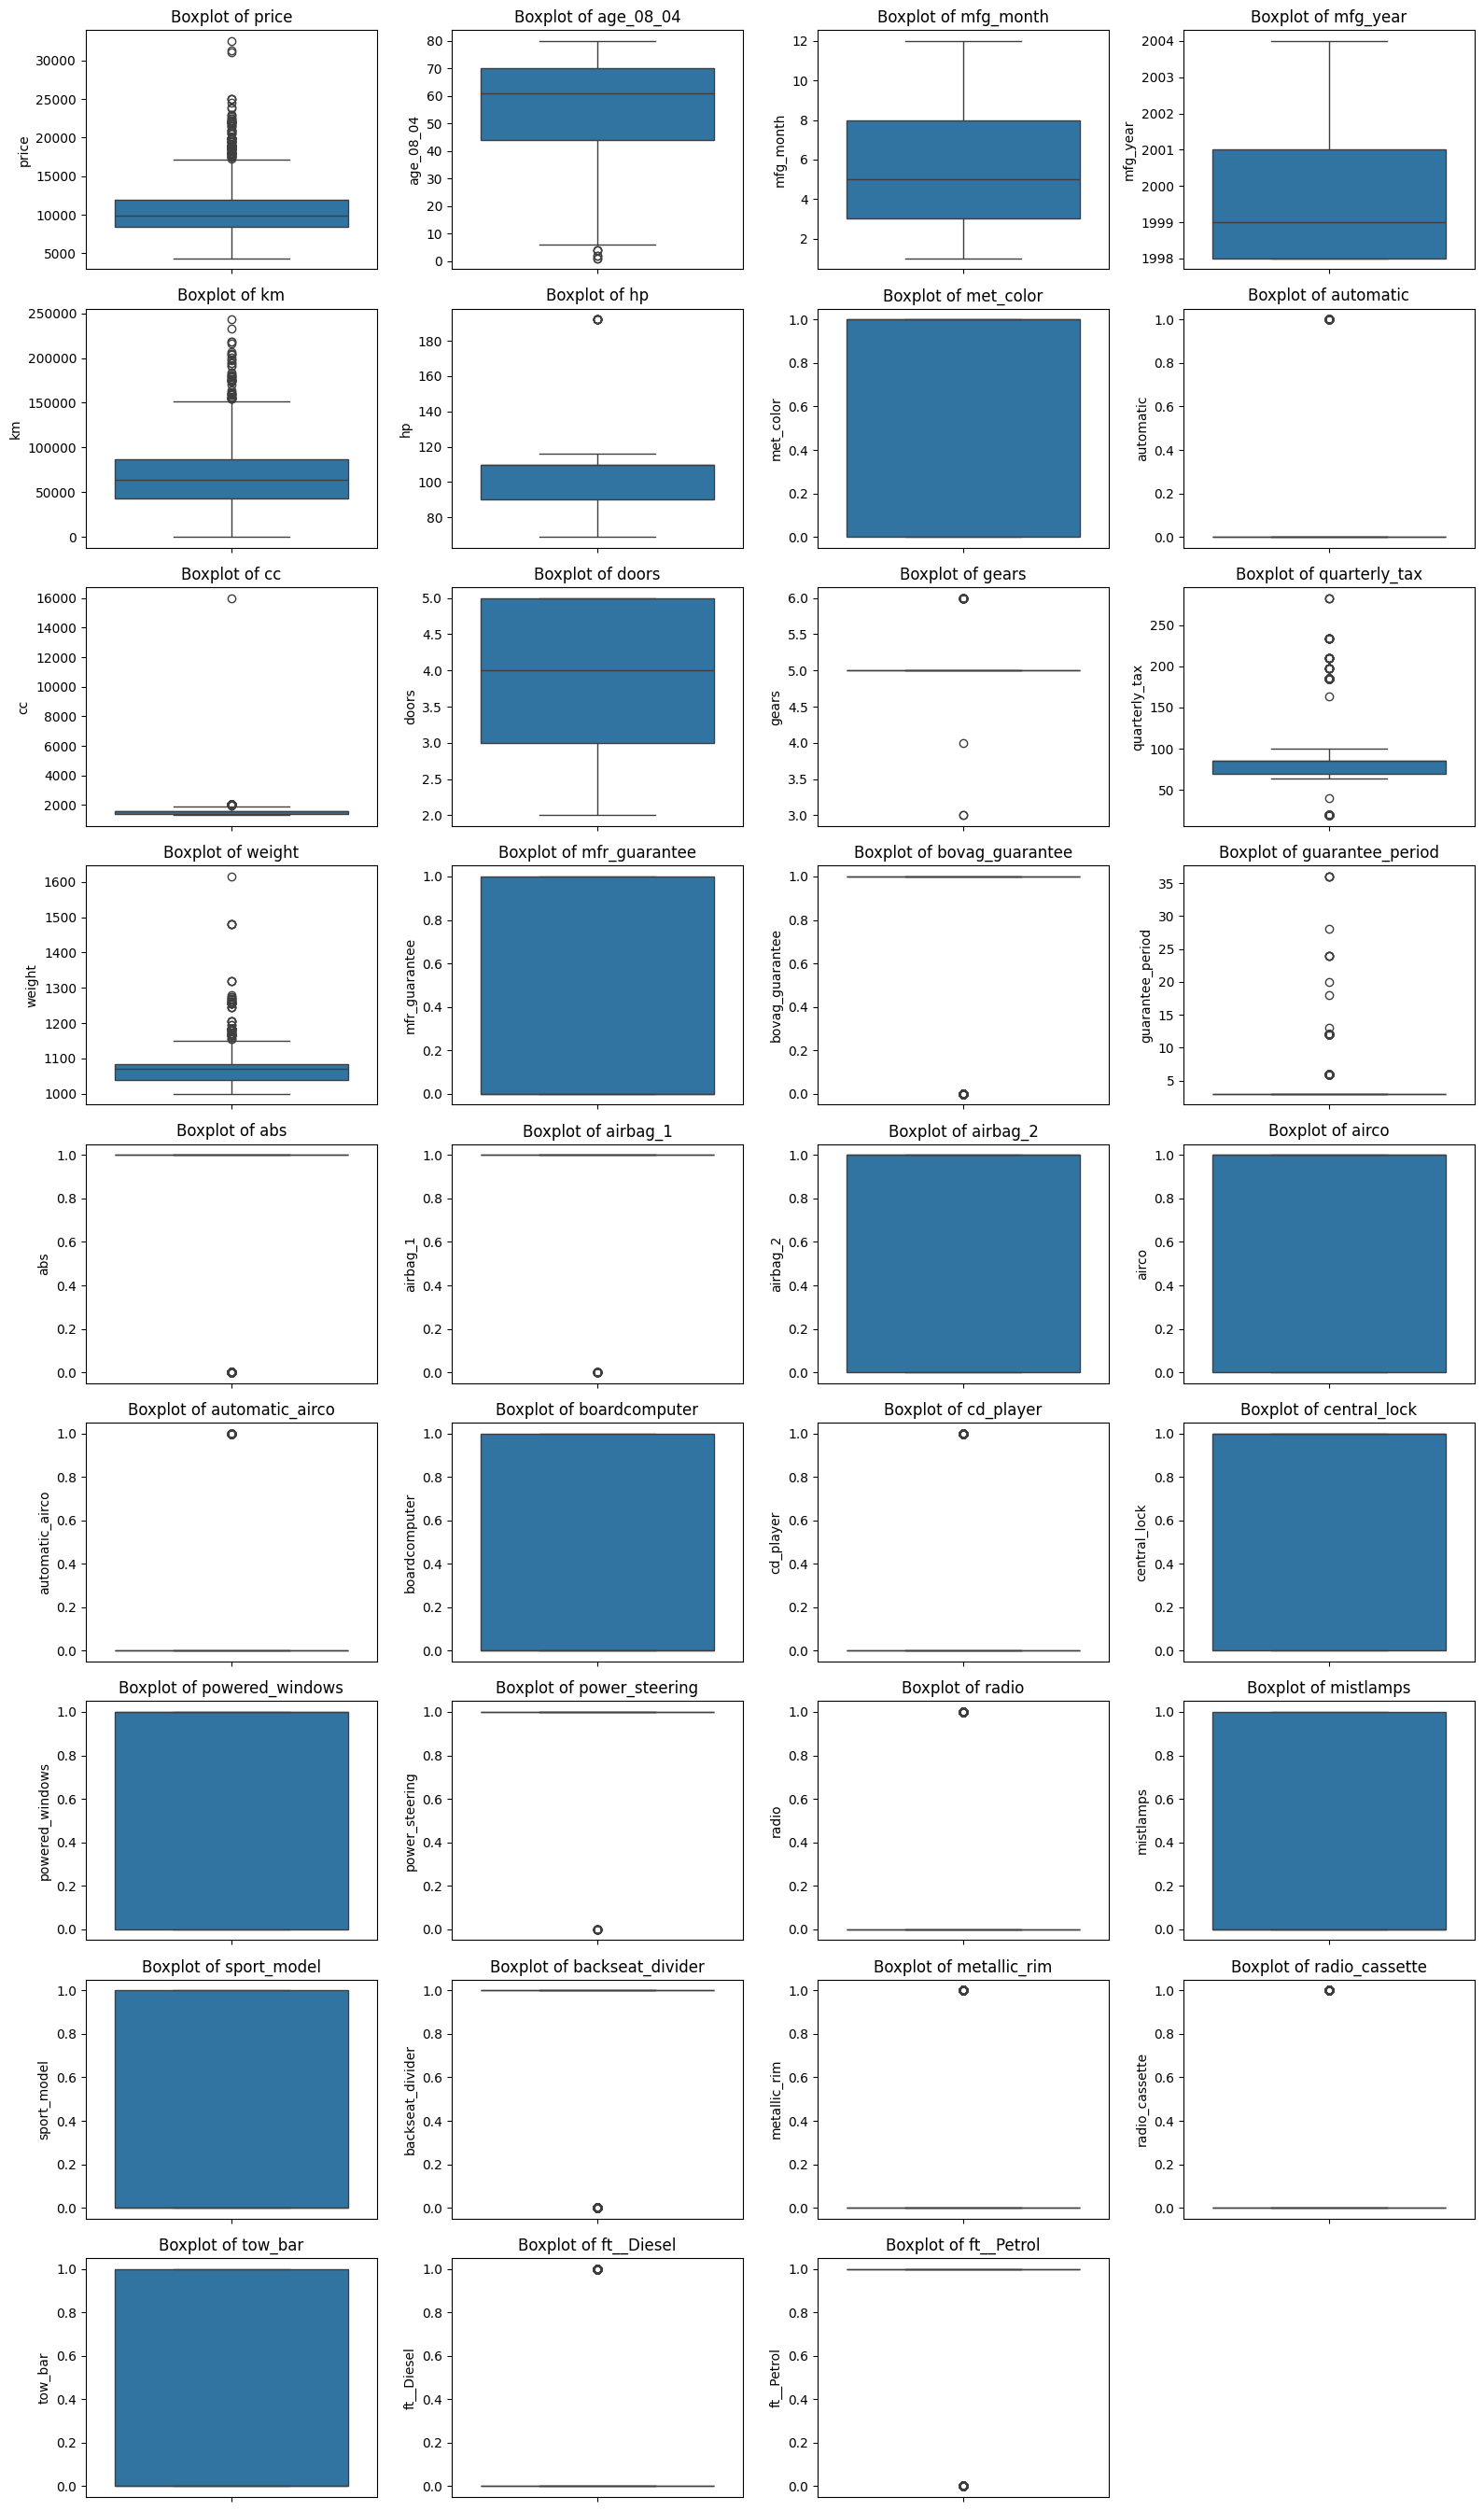

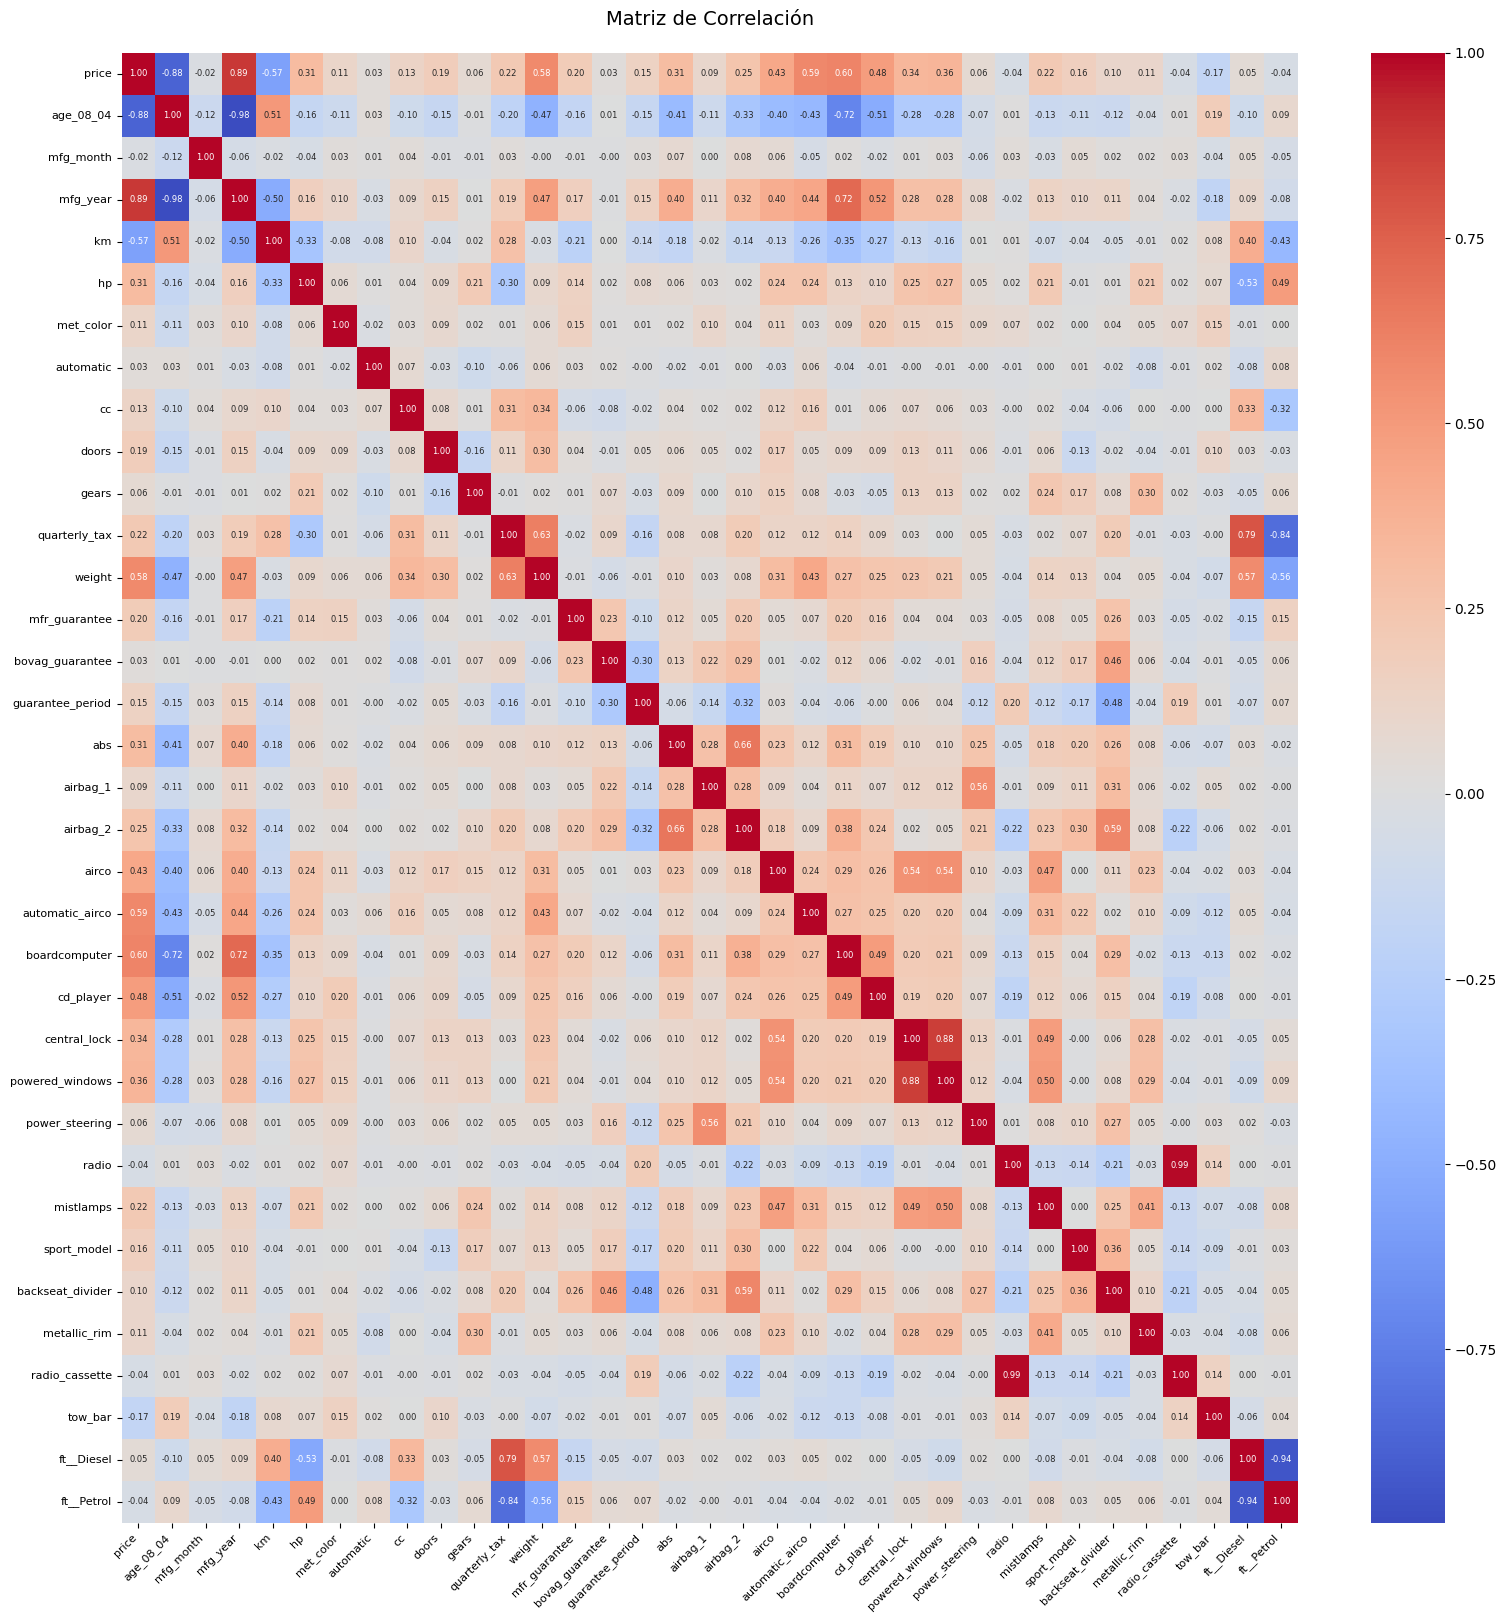

In [14]:
def generateEda(df: pd.DataFrame):

    numeric_features = [col for col in df.columns]
    n = len(numeric_features)
    n_cols = 4
    n_rows = math.ceil(n / n_cols)

    plt.figure(figsize=(4 * n_cols, 3 * n_rows))
    for idx, column in enumerate(numeric_features):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histograma de {column}')
        plt.tight_layout()
    plt.show()
    plt.close()

    # 🔹 Boxplots
    plt.figure(figsize=(4 * n_cols, 3 * n_rows))
    for i, column in enumerate(numeric_features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
    plt.show()
    plt.close()

    # 🔹 Matriz de correlación
    df_corr = df.drop(columns=[])
    correlation_matrix = df_corr.corr()

    # Ajusta el tamaño de la figura según la cantidad de columnas
    n_cols = len(correlation_matrix.columns)
    fig_size = max(10, n_cols * 0.6)  # Puedes ajustar el factor 0.6 según lo que veas mejor

    plt.figure(figsize=(fig_size, fig_size))
    ax = sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        annot_kws={'size': 6}
    )
    plt.title('Matriz de Correlación', pad=20, size=14)
    plt.xticks(
        ticks=np.arange(n_cols) + 0.5,  # Centra los nombres
        labels=correlation_matrix.columns,
        rotation=45,
        ha='right',
        fontsize=8
    )
    plt.yticks(
        ticks=np.arange(n_cols) + 0.5,
        labels=correlation_matrix.index,
        rotation=0,
        fontsize=8
    )
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25, top=0.95, left=0.25, right=0.95)  # Da más espacio a los nombres
    plt.show()
    plt.close()

generateEda(df)

Visualización de la variable objetivo (Price).

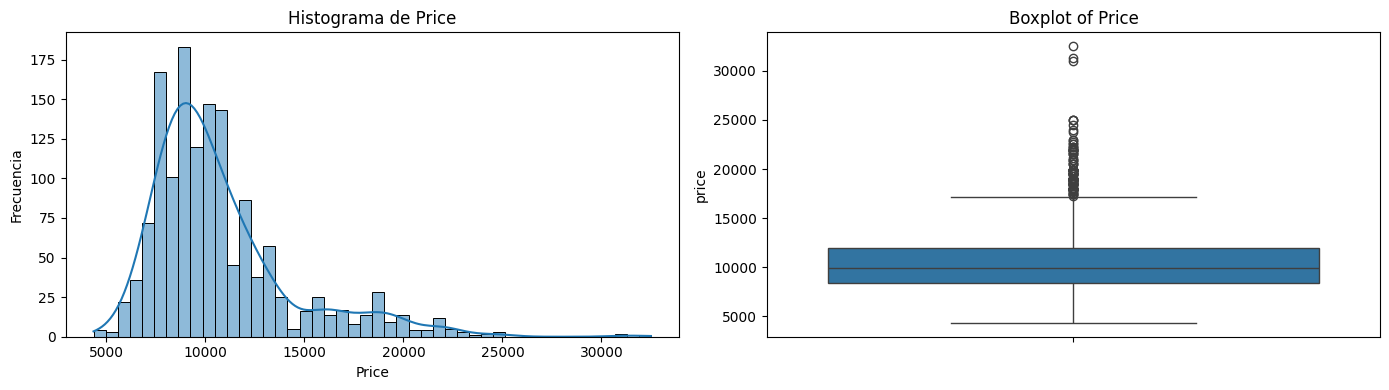

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()


Se nota que el histograma adopta una forma parecida a una distribución normal, aunque se extiende hacia el lado derecho.
Este tipo de distribución muestra un sesgo hacia valores altos, lo que implica que el promedio será superior a la mediana, y esta a su vez será mayor que la moda.
Debido a esta asimetría, se decidió aplicar la transformación logarítmica np.log1p, ya que permite reducir la influencia de los valores extremos y acercar la distribución a una forma más simétrica, facilitando así el uso de modelos estadísticos que asumen normalidad

Transformamos Price

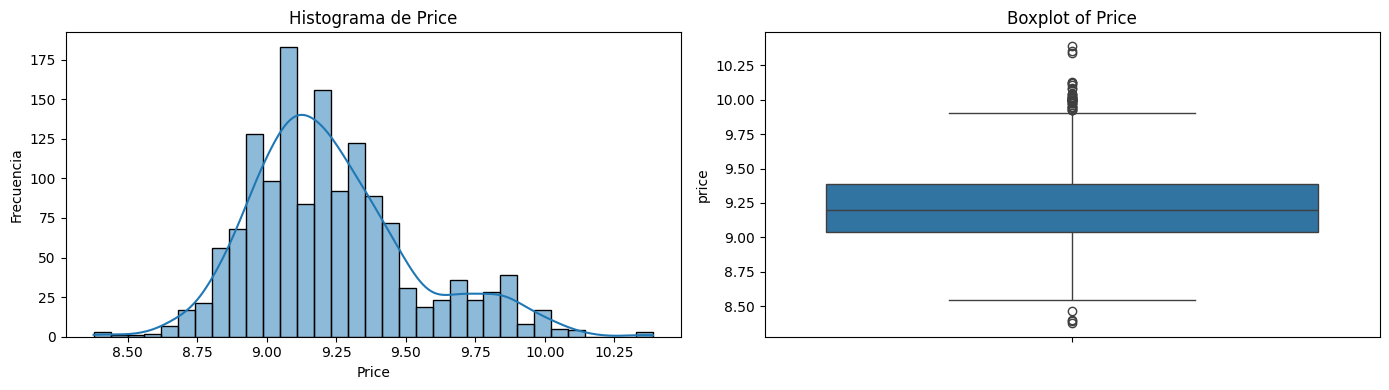

In [16]:
df['price']= np.log1p(df['price'])	

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

Dividimos el dataset en datos de entrenamiento y test

In [17]:

split_param = {
    'test_size' :0.2,
    'random_state': 42,
    'shuffle': True
}

x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 34), (288, 34), (1148,), (288,))

2025/05/30 14:12:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


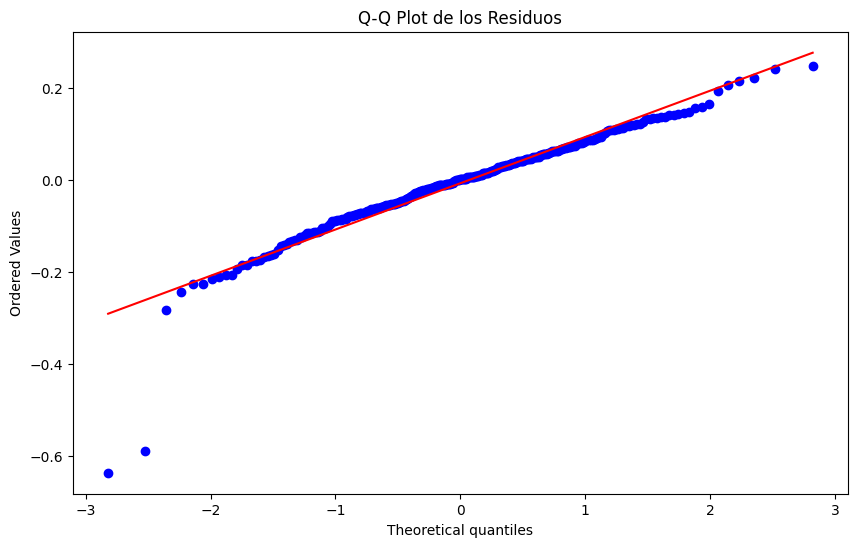

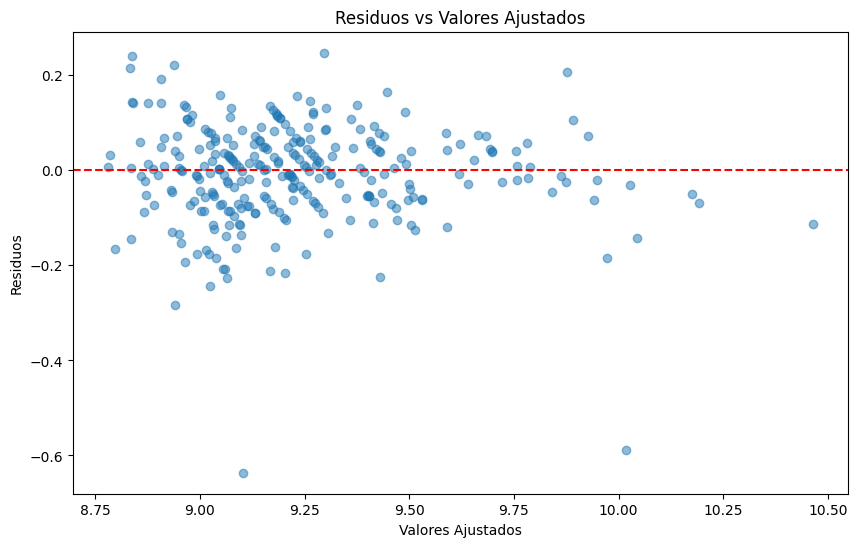

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     256.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:13:01   Log-Likelihood:                 1002.6
No. Observations:                1148   AIC:                            -1937.
Df Residuals:                    1114   BIC:                            -1766.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.386e-06   5.22e-08  

In [18]:


with mlflow.start_run(run_name="fs_model"):
    model_fs = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    X_test_with_const = sm.add_constant(x_test)
    y_pred_fs = model_fs.predict(X_test_with_const)
    residuals = y_test - y_pred_fs
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot de los Residuos")
    plt.savefig("qq_plot.png")
    mlflow.log_artifact("qq_plot.png")
    plt.show()
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_fs, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.savefig("residuals_vs_fitted.png")
    mlflow.log_artifact("residuals_vs_fitted.png")
    plt.show()
    plt.close()
    print(model_fs.summary())
    mlflow.end_run()

Como definimos mlflow.autolog() en la definicion de variables los diferentes valores para el analisis se guardan automaticamente

### Evaluaremos distintos rangos en la normalización del precio y ejecutaremos el modelo con cada uno para determinar cuál es el más adecuado para continuar el análisis.

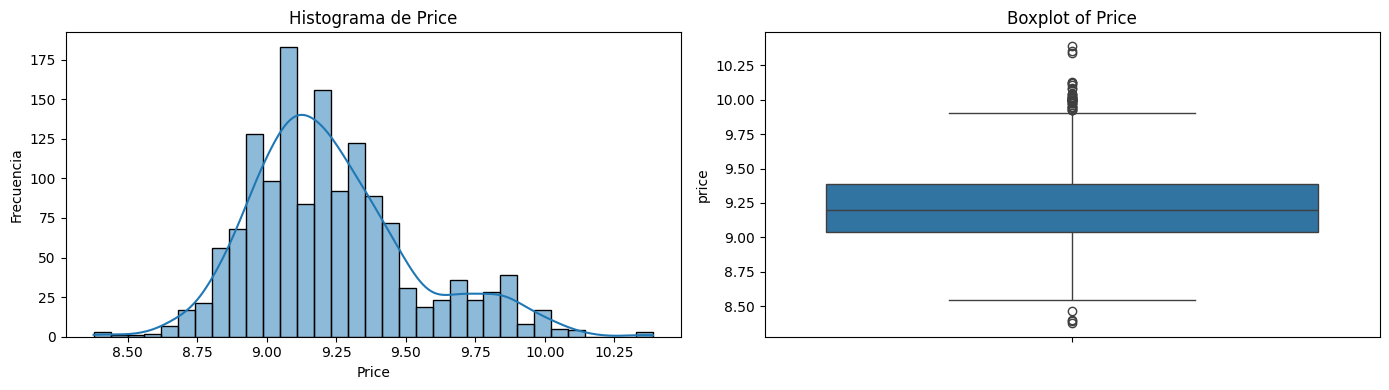

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

## Primer Corte

### Eliminar registros con precios mayores a 10 para eliminar los outliers mas lejanos

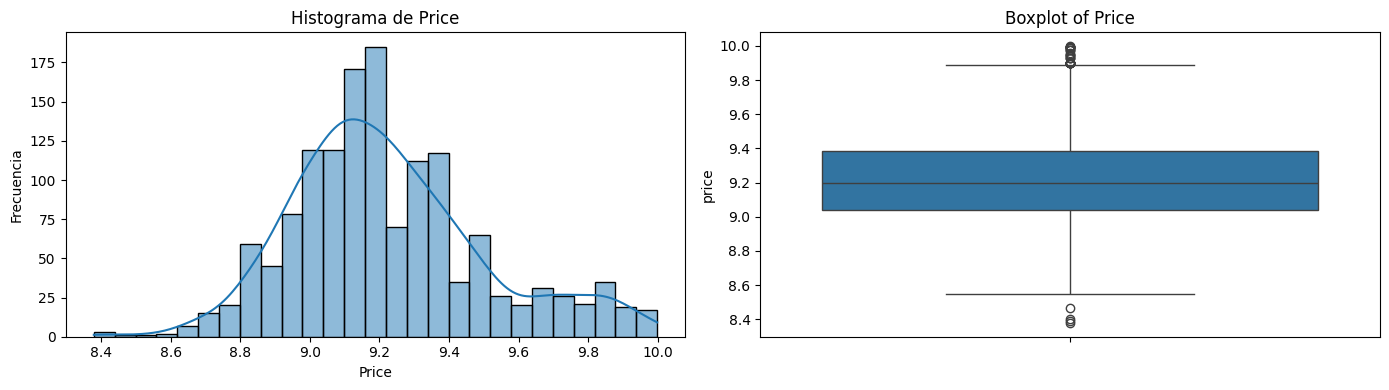

In [20]:
df10 = df[df['price'] <= 10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df10['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df10['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df10.drop(['price'], axis=1), df10.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1135, 34), (284, 34), (1135,), (284,))

Primera ejecución de una regresión con todas las variables y con registros de precios <=10

2025/05/30 14:13:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


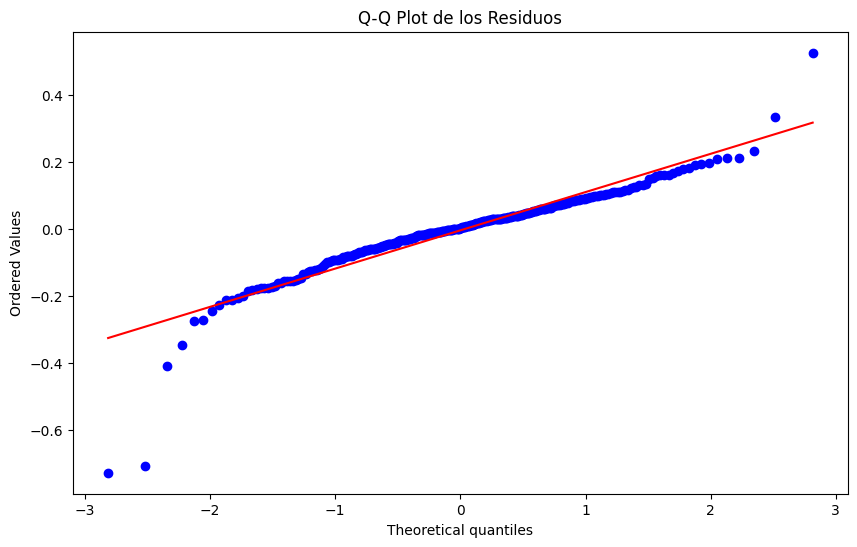

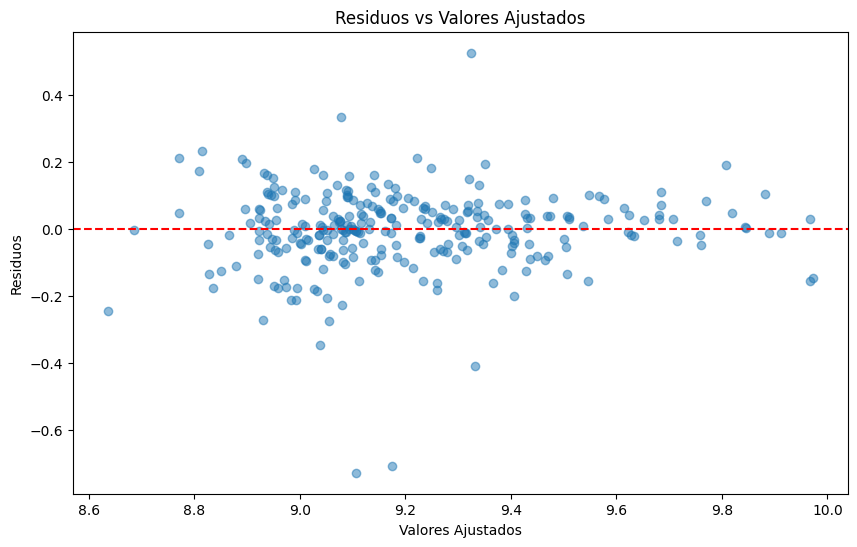

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     248.7
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:                 1043.2
No. Observations:                1135   AIC:                            -2018.
Df Residuals:                    1101   BIC:                            -1847.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.483e-06   4.96e-08  

In [22]:

with mlflow.start_run(run_name="fs_model_p10"):
    model_fs = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    X_test_with_const = sm.add_constant(x_test)
    y_pred_fs = model_fs.predict(X_test_with_const)
    residuals = y_test - y_pred_fs
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot de los Residuos")
    plt.savefig("qq_plot.png")
    mlflow.log_artifact("qq_plot.png")
    plt.show()
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_fs, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.savefig("residuals_vs_fitted.png")
    mlflow.log_artifact("residuals_vs_fitted.png")
    plt.show()
    plt.close()
    print(model_fs.summary())
    mlflow.end_run()

## Segundo Corte

### Eliminar registros con precios mayores a 9.8

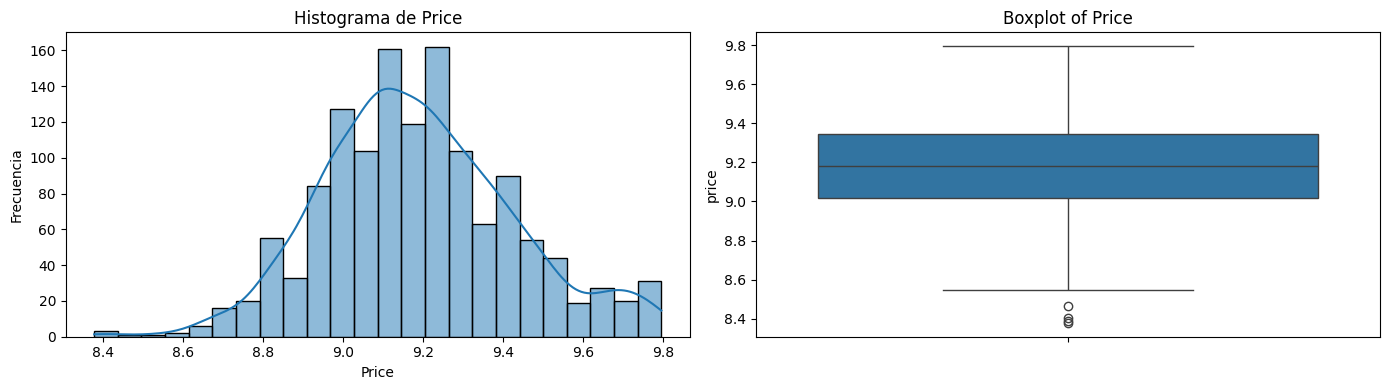

In [23]:
df98 = df[df['price'] <= 9.8]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df98['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df98['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df98.drop(['price'], axis=1), df98.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1076, 34), (270, 34), (1076,), (270,))

2025/05/30 14:13:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


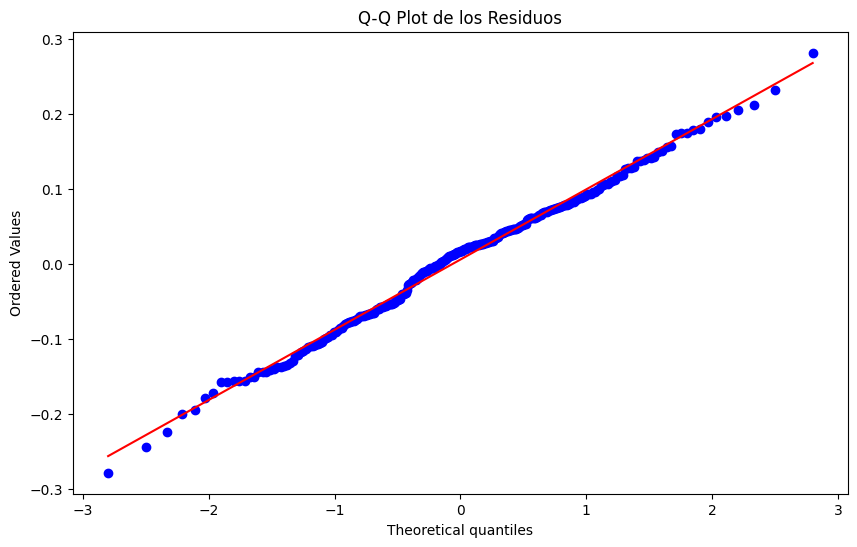

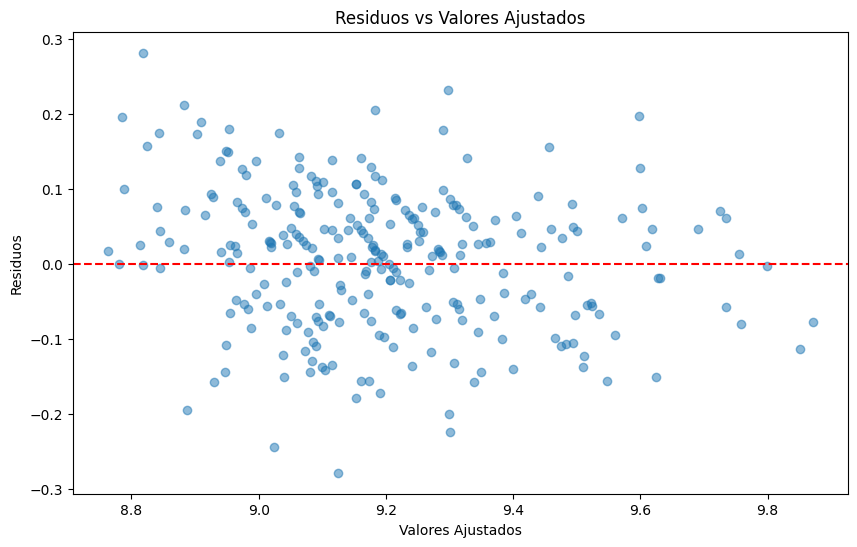

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     148.2
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:13:31   Log-Likelihood:                 920.92
No. Observations:                1076   AIC:                            -1774.
Df Residuals:                    1042   BIC:                            -1604.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.519e-06   5.51e-08  

In [25]:
with mlflow.start_run(run_name="fs_model_p98"):
    model_fs = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    X_test_with_const = sm.add_constant(x_test)
    y_pred_fs = model_fs.predict(X_test_with_const)
    residuals = y_test - y_pred_fs
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot de los Residuos")
    plt.savefig("qq_plot.png")
    mlflow.log_artifact("qq_plot.png")
    plt.show()
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_fs, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.savefig("residuals_vs_fitted.png")
    mlflow.log_artifact("residuals_vs_fitted.png")
    plt.show()
    plt.close()
    print(model_fs.summary())
    mlflow.end_run()

Al analizar los indicadores AIC, BIC, R-squared y la F-statistic, concluimos que el punto de corte en 9.8 deterioró el rendimiento del modelo.
Si bien la gráfica de residuos muestra una aparente mejora en la alineación, los criterios estadísticos indican una pérdida en la calidad del ajuste

## Tercer Corte

### Eliminar registros con precios menores a 8.5 y mayores a 10

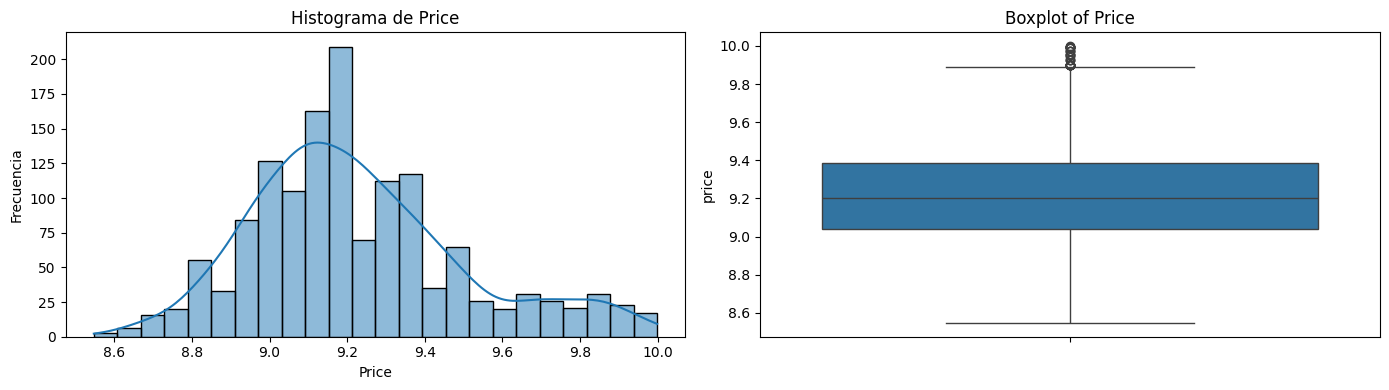

In [26]:
df_best = df[(df['price'] >= 8.5) & (df['price'] <= 10)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_best['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_best['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_best.drop(['price'], axis=1), df_best.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1132, 34), (283, 34), (1132,), (283,))

2025/05/30 14:13:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


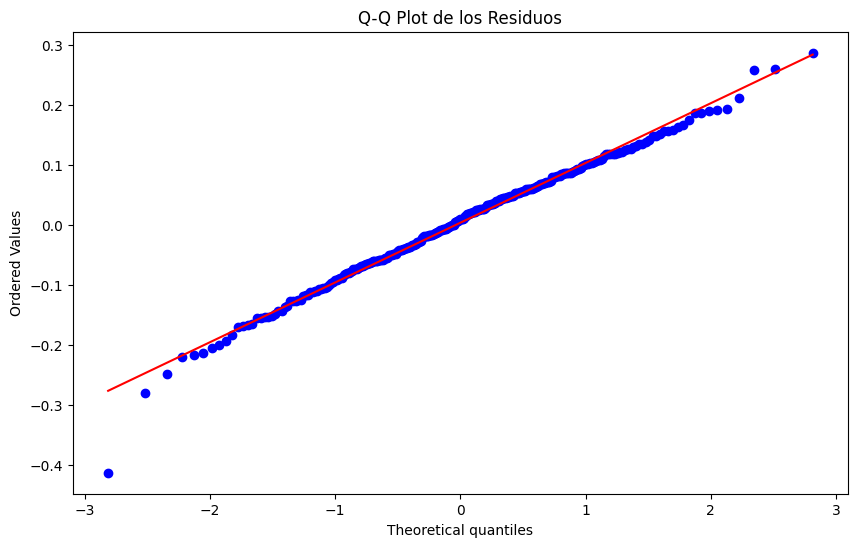

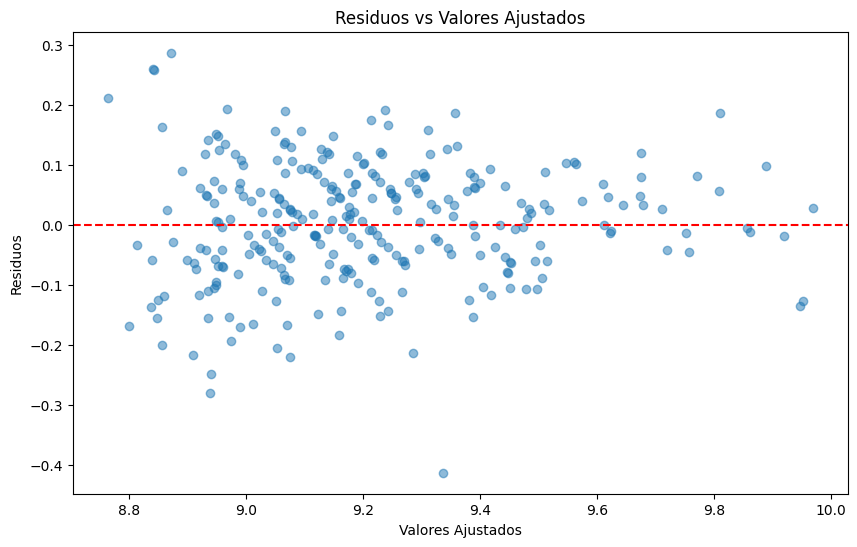

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:13:45   Log-Likelihood:                 1049.3
No. Observations:                1132   AIC:                            -2031.
Df Residuals:                    1098   BIC:                            -1860.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.491e-06   4.82e-08  

In [28]:
with mlflow.start_run(run_name="fs_model_85_10"):
    model_fs = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    X_test_with_const = sm.add_constant(x_test)
    y_pred_fs = model_fs.predict(X_test_with_const)
    residuals = y_test - y_pred_fs
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot de los Residuos")
    plt.savefig("qq_plot.png")
    mlflow.log_artifact("qq_plot.png")
    plt.show()
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_fs, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.savefig("residuals_vs_fitted.png")
    mlflow.log_artifact("residuals_vs_fitted.png")
    plt.show()
    plt.close()
    print(model_fs.summary())
    mlflow.end_run()

Optamos por quedarnos con el dataset con el tercer corte ya que es el que poseía mejor valor de skew a comparación de los otros, y mantiene valores muy buenos en parametros como F-statistic, R2, AIC, RMSE, MAE, cuando se los compara con los otros modelos.

Se puede apreciar como el precio está mas normalizado, a diferencia de como estaba en el dataset inicial.

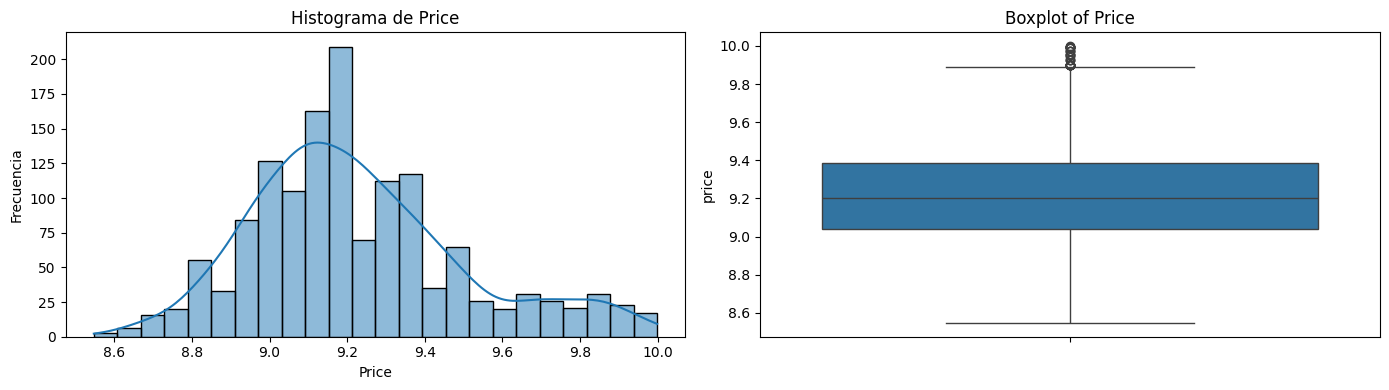

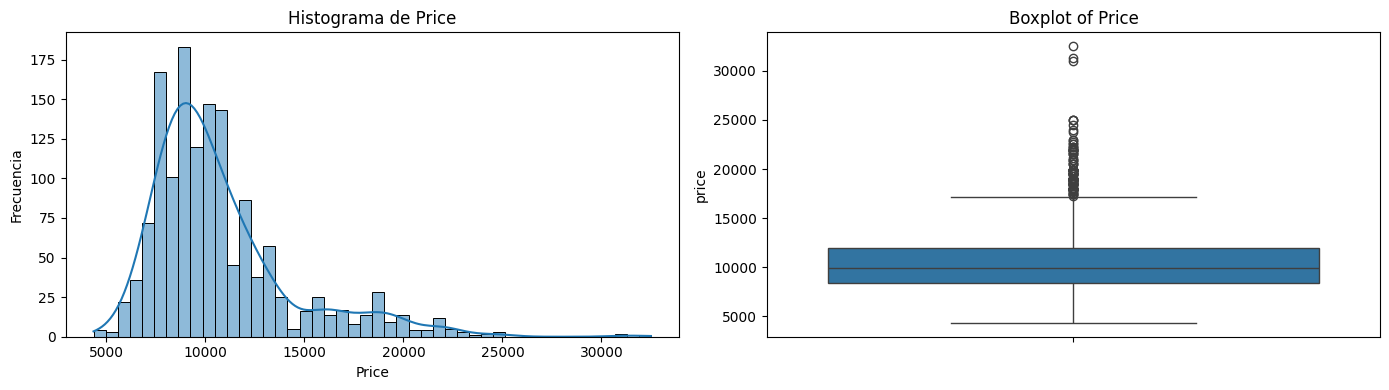

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_best['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_best['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_raw['price'], kde=True, ax=ax1)
ax1.set_title('Histograma de Price')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_raw['price'], ax=ax2)
ax2.set_title('Boxplot of Price')

plt.tight_layout()
plt.show()
plt.close()

df= df_best

### Limpieza y analisis de Outliers

In [30]:
df.describe().T

count          mean           std          min  \
price             1415.0      9.225578      0.278529     8.546946   
age_08_04         1415.0     56.467138     18.092138     1.000000   
mfg_month         1415.0      5.578799      3.348770     1.000000   
mfg_year          1415.0   1999.579505      1.492747  1998.000000   
km                1415.0  68883.488339  37029.581316     1.000000   
hp                1415.0    101.314488     14.353219    69.000000   
met_color         1415.0      0.672792      0.469360     0.000000   
automatic         1415.0      0.056537      0.231038     0.000000   
cc                1415.0   1572.272085    425.471465  1300.000000   
doors             1415.0      4.024735      0.952230     2.000000   
gears             1415.0      5.026148      0.188105     3.000000   
quarterly_tax     1415.0     86.096820     39.013015    19.000000   
weight            1415.0   1069.881272     46.288164  1000.000000   
mfr_guarantee     1415.0      0.409894      0.491988     0.000000   
bovag_guarantee   1415.0      0.898940      0.301515     0.000000   
guarantee_period  1415.0      3.806360      2.975970     3.000000   
abs               1415.0      0.811307      0.391403     0.000000   
airbag_1          1415.0      0.971025      0.167796     0.000000   
airbag_2          1415.0      0.723675      0.447338     0.000000   
airco             1415.0      0.503180      0.500167     0.000000   
automatic_airco   1415.0      0.048057      0.213961     0.000000   
boardcomputer     1415.0      0.289046      0.453480     0.000000   
cd_player         1415.0      0.212721      0.409377     0.000000   
central_lock      1415.0      0.573852      0.494691     0.000000   
powered_windows   1415.0      0.556890      0.496929     0.000000   
power_steering    1415.0      0.977385      0.148725     0.000000   
radio             1415.0      0.146996      0.354228     0.000000   
mistlamps         1415.0      0.255124      0.436085     0.000000   
sport_model       1415.0      0.298233      0.457644     0.000000   
backseat_divider  1415.0      0.773145      0.418946     0.000000   
metallic_rim      1415.0      0.200000      0.400141     0.000000   
radio_cassette    1415.0      0.146290      0.353521     0.000000   
tow_bar           1415.0      0.281979      0.450122     0.000000   
ft__Diesel        1415.0      0.098940      0.298687     0.000000   
ft__Petrol        1415.0      0.889046      0.314186     0.000000   

                          25%           50%           75%            max  
price                 9.04204      9.200391      9.384168       9.998843  
age_08_04            44.00000     61.000000     70.000000      80.000000  
mfg_month             3.00000      5.000000      8.000000      12.000000  
mfg_year           1998.00000   1999.000000   2001.000000    2004.000000  
km                43571.00000  63870.000000  87178.500000  243000.000000  
hp                   88.00000    110.000000    110.000000     192.000000  
met_color             0.00000      1.000000      1.000000       1.000000  
automatic             0.00000      0.000000      0.000000       1.000000  
cc                 1400.00000   1600.000000   1600.000000   16000.000000  
doors                 3.00000      4.000000      5.000000       5.000000  
gears                 5.00000      5.000000      5.000000       6.000000  
quarterly_tax        69.00000     85.000000     85.000000     234.000000  
weight             1040.00000   1065.000000   1085.000000    1615.000000  
mfr_guarantee         0.00000      0.000000      1.000000       1.000000  
bovag_guarantee       1.00000      1.000000      1.000000       1.000000  
guarantee_period      3.00000      3.000000      3.000000      36.000000  
abs                   1.00000      1.000000      1.000000       1.000000  
airbag_1              1.00000      1.000000      1.000000       1.000000  
airbag_2              0.00000      1.000000      1.000000       1.000000  
airco                 0.00000     

Analizamos la simetria de KM

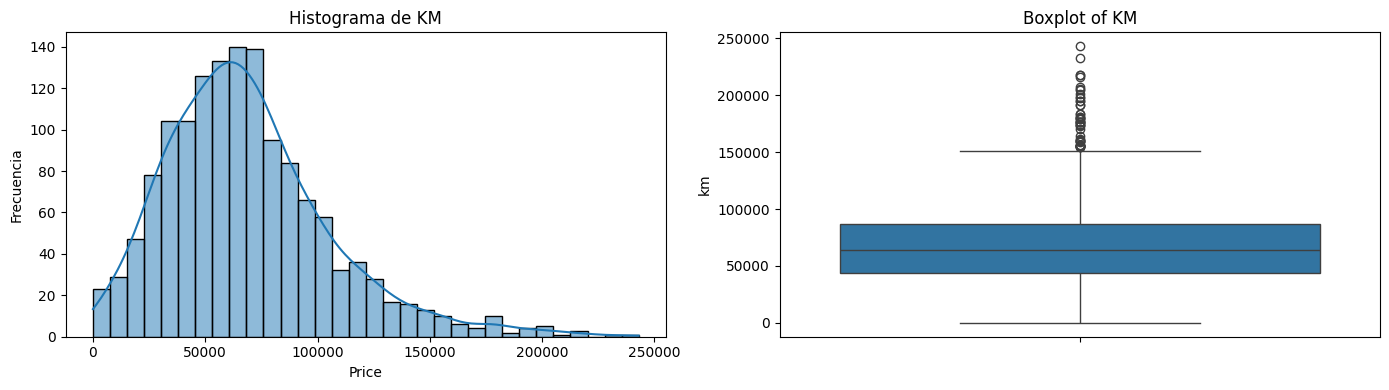

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_best['km'], kde=True, ax=ax1)
ax1.set_title('Histograma de KM')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_best['km'], ax=ax2)
ax2.set_title('Boxplot of KM')

plt.tight_layout()
plt.show()
plt.close()


#### Dado que la variable presenta una asimetría positiva con una ligera cola hacia la derecha, se optó por aplicar una transformación Yeo-Johnson, con el objetivo de aproximar su distribución a la normalidad y mejorar la estabilidad del modelo.

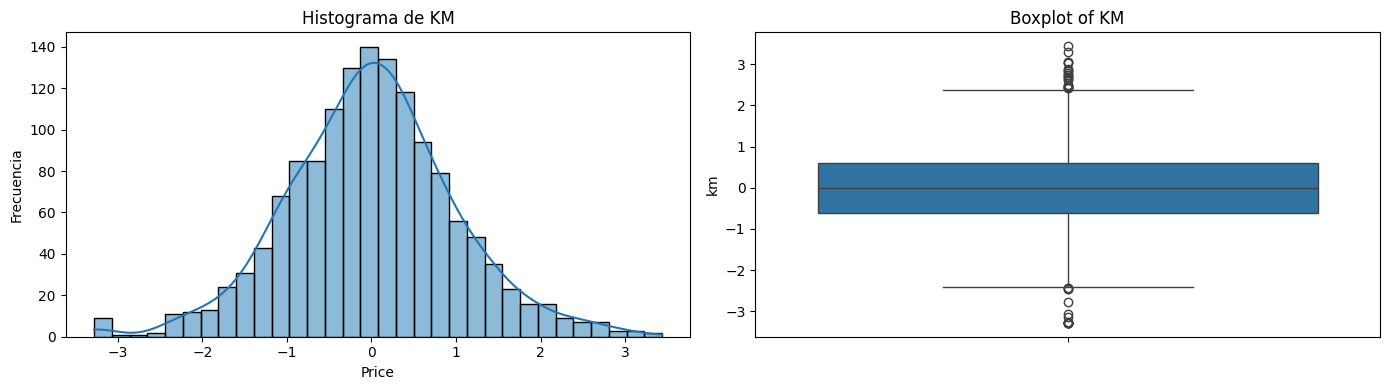

In [32]:
df_tranformer_km = df.copy()
df_tranformer_km['km'] = pt_yj.fit_transform(df_tranformer_km[['km']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_tranformer_km['km'], kde=True, ax=ax1)
ax1.set_title('Histograma de KM')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_tranformer_km['km'], ax=ax2)
ax2.set_title('Boxplot of KM')

plt.tight_layout()
plt.show()
plt.close()

Limpiamos outliers restantes

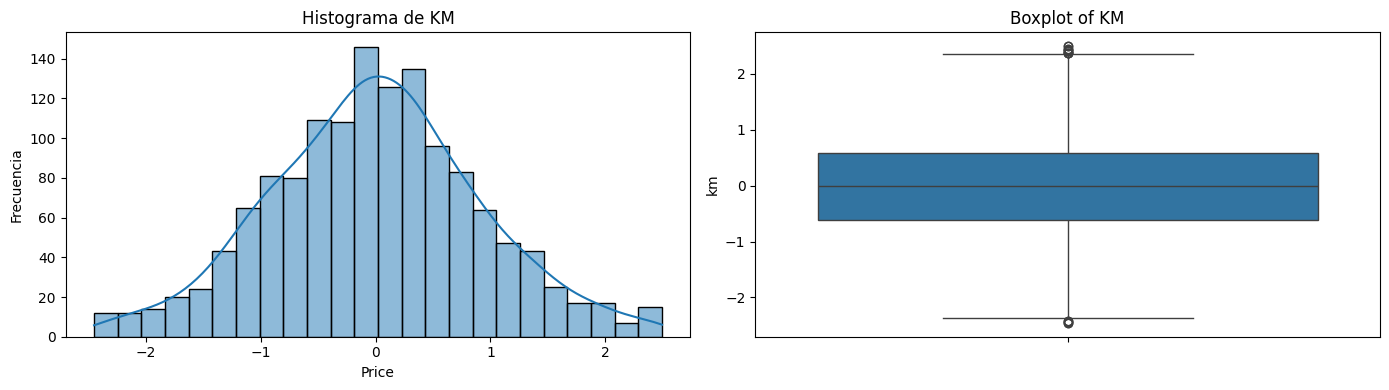

In [33]:
df_tranformer_km = df_tranformer_km[(df_tranformer_km['km'] >= -2.5) & (df_tranformer_km['km'] <= 2.5)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df_tranformer_km['km'], kde=True, ax=ax1)
ax1.set_title('Histograma de KM')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frecuencia')

sns.boxplot(y=df_tranformer_km['km'], ax=ax2)
ax2.set_title('Boxplot of KM')

plt.tight_layout()
plt.show()
plt.close()

In [34]:

df = df_tranformer_km
df_tranformer_km.shape

(1389, 35)

Utilizamos los graficos de cajas y bigotes para ver mejor los outliers de cada variable

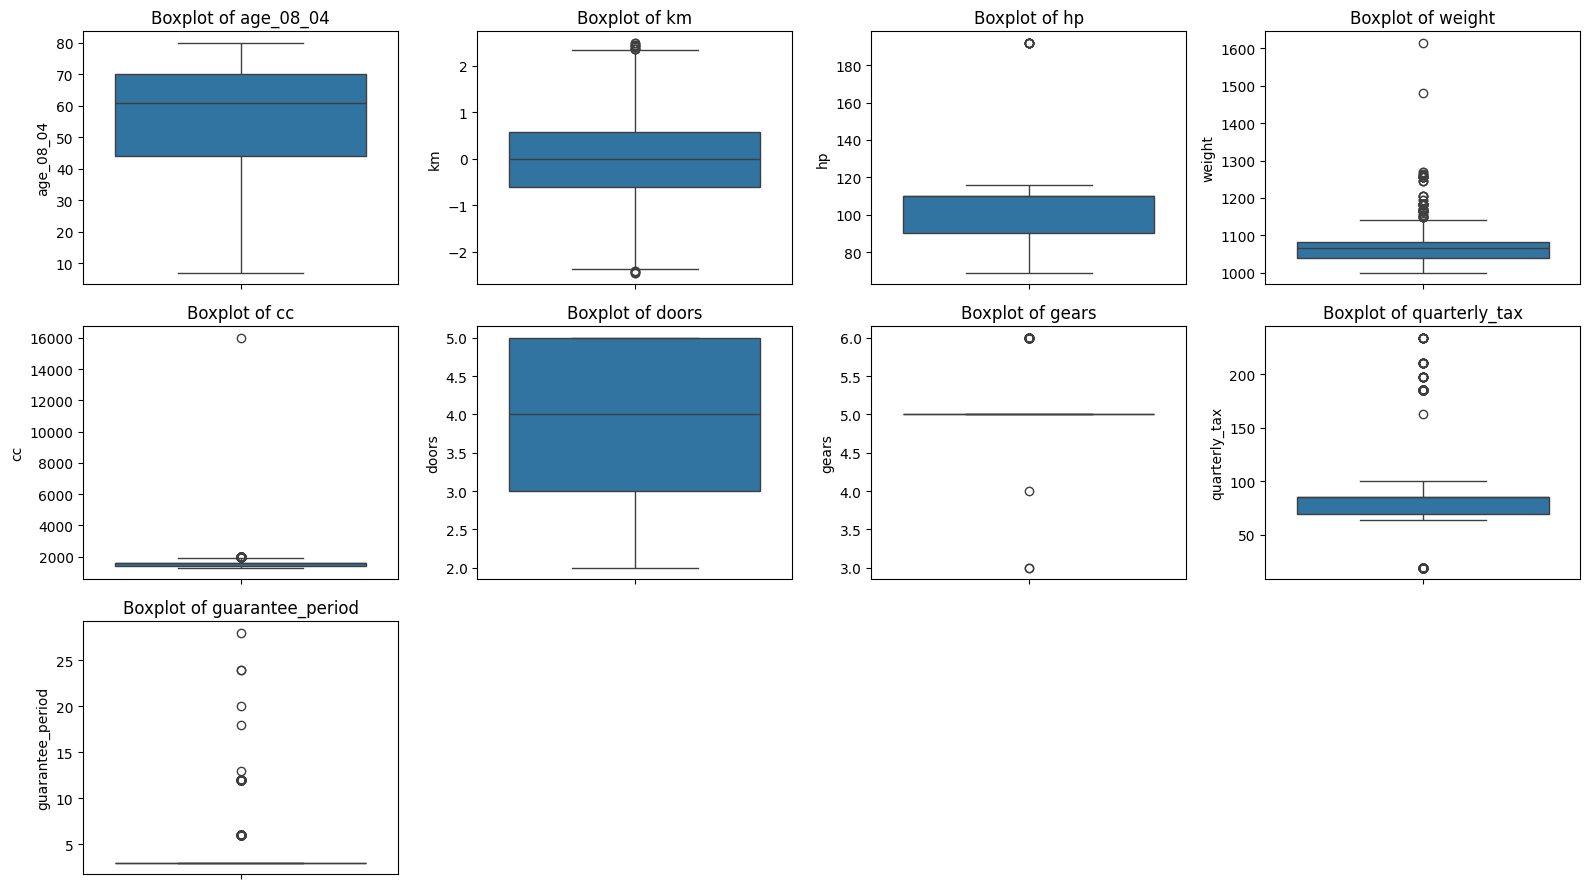

In [35]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']

numeric_features = [col for col in boxplots]
n = len(numeric_features)
n_cols = 4
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(4 * n_cols, 3 * n_rows))
for i, column in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()
plt.close()

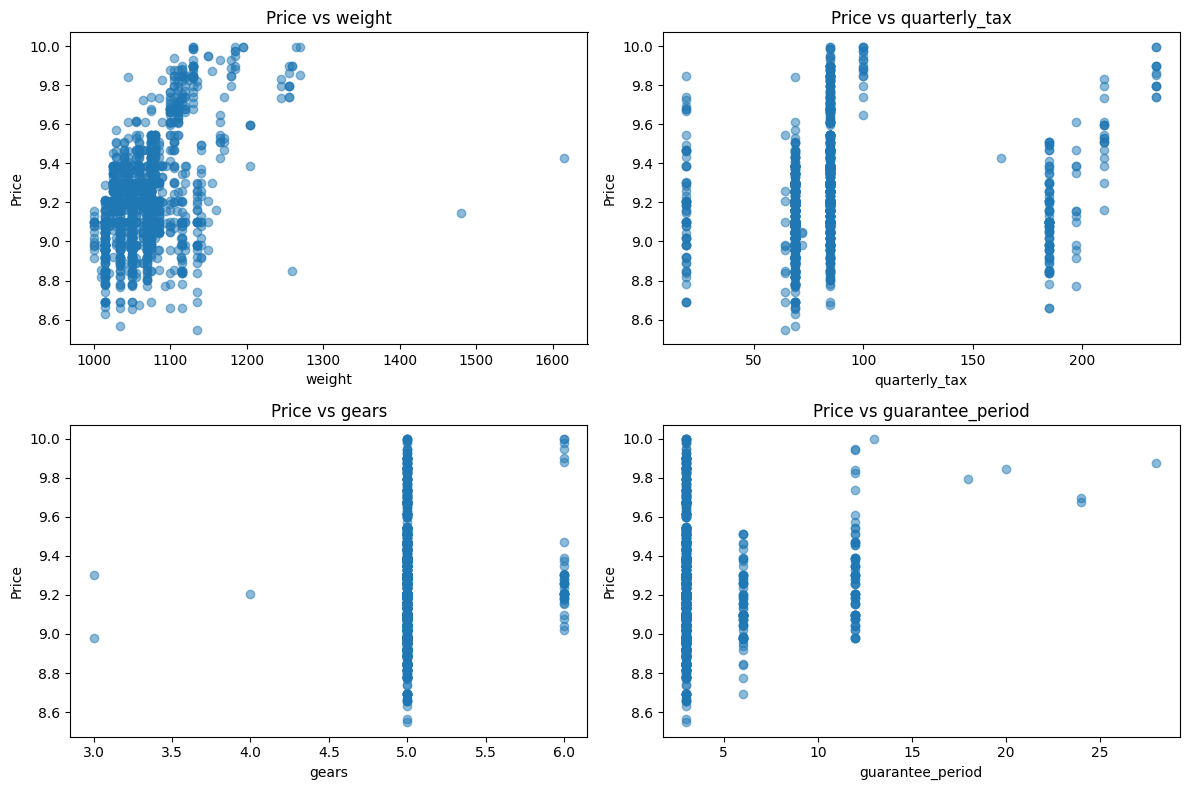

In [36]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

# Crear scatter plots para cada variable
n = len(variables_continuas_scatter)
n_cols = 2
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(12, 4 * n_rows))
for i, var in enumerate(variables_continuas_scatter):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(df[var], df['price'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.title(f'Price vs {var}')
    plt.tight_layout()
plt.show()
plt.close()


Empezamos analizando los outliers de HP

In [37]:
cantidad_registros = df[df['hp'] == 192].shape[0]

print(f"La cantidad de registros con 'hp' igual a 192 es: {cantidad_registros}")

La cantidad de registros con 'hp' igual a 192 es: 8


Ya que la cantidad de registros es baja, decidimos eliminarlos

In [38]:
df = df[df['hp'] < 192]

Comprobamos que efectivamente se hayan eliminado

In [39]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1381, 35)


Analizamos outliers de Weight

In [40]:
cantidad_registros = df[df['weight'] > 1400].shape[0]

print(f"La cantidad de registros con 'weight' mayor a 1400 es: {cantidad_registros}")

La cantidad de registros con 'weight' mayor a 1400 es: 2


Ya que la cantidad de registros es baja, decidimos eliminarlos

In [41]:
df = df[df['weight'] <= 1400]

In [42]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1379, 35)


Graficamos la variable gears para entenderla mejor

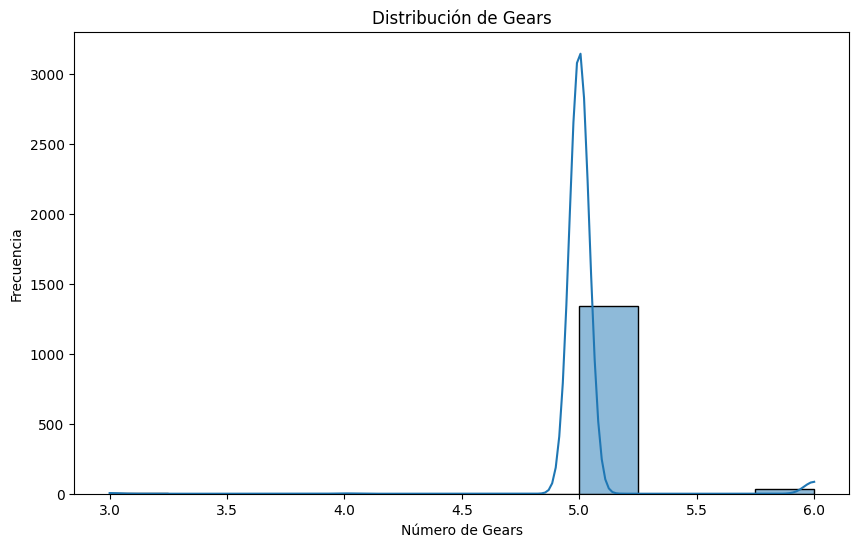

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gears', kde=True)
plt.title('Distribución de Gears')
plt.xlabel('Número de Gears')
plt.ylabel('Frecuencia')
plt.show()


In [44]:
cantidad_registros1 = df[df['gears'] == 6].shape[0]
cantidad_registros2 = df[df['gears'] < 4.5].shape[0]

print(f"La cantidad de registros con 'gears' igual a 6 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'gears' menor a 4.5 es: {cantidad_registros2}")

La cantidad de registros con 'gears' igual a 6 es: 36
La cantidad de registros con 'gears' menor a 4.5 es: 3


Vemos que la cantidad de registros mayores a 6 es muy alta y como tenemos un dataset que no tiene muchos registros no podemos eliminarlos, en cambio los outliers menores a 4.5 son pocos y decidimos eliminarlos

In [45]:
df = df[df['gears'] > 4]

In [46]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1376, 35)


Graficamos la variable quarterly_tax para entenderla mejor

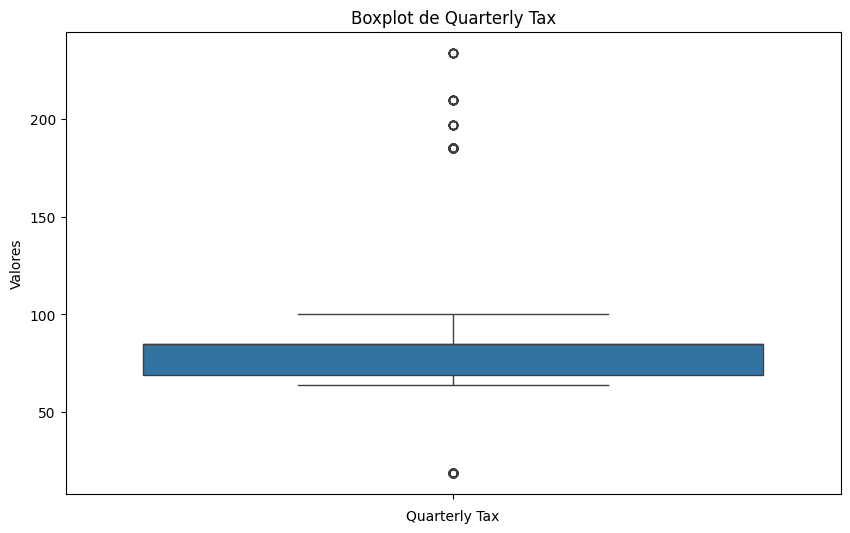

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['quarterly_tax'])
plt.title('Boxplot de Quarterly Tax')
plt.xlabel('Quarterly Tax')
plt.ylabel('Valores')
plt.show()

In [48]:
cantidad_registros1 = df[df['quarterly_tax'] > 150].shape[0]
cantidad_registros2 = df[df['quarterly_tax'] < 50].shape[0]

print(f"La cantidad de registros con 'quarterly_tax' mayor a 150 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'quarterly_tax' menor a 50 es: {cantidad_registros2}")

La cantidad de registros con 'quarterly_tax' mayor a 150 es: 127
La cantidad de registros con 'quarterly_tax' menor a 50 es: 64


Vemos que posee muchos registros asi que decidimos quedarnos con los mismos

Graficamos la variable guarantee_period para entenderla mejor

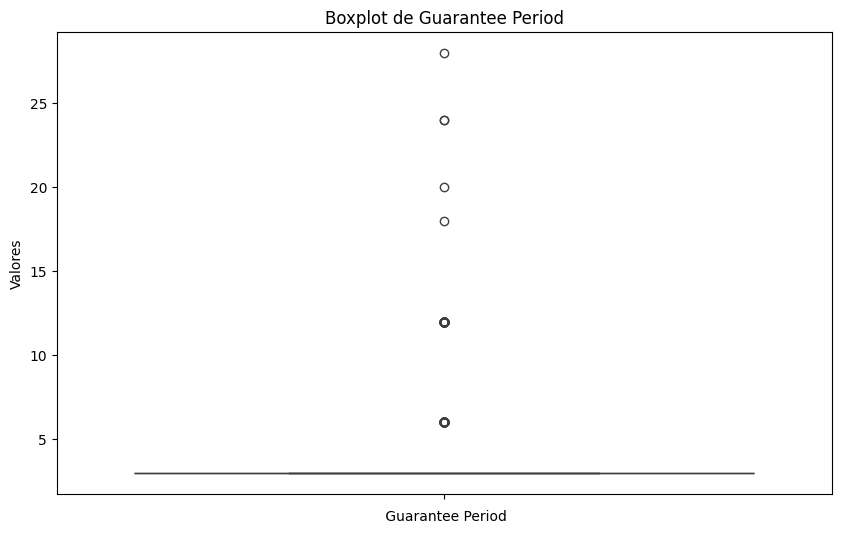

In [49]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['guarantee_period'])
plt.title('Boxplot de Guarantee Period')
plt.xlabel(' Guarantee Period')
plt.ylabel('Valores')
plt.show()

In [50]:
cantidad_registros1 = df[df['guarantee_period'] > 35].shape[0]
print(f"La cantidad de registros con 'guarantee_period' mayor a 35 es: {cantidad_registros1}") 

La cantidad de registros con 'guarantee_period' mayor a 35 es: 0


Ya que la cantidad de registros es baja, decidimos eliminarlos

In [51]:
df = df[df['guarantee_period'] < 35]

In [52]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1376, 35)


Graficamos la variable cc para entenderla mejor

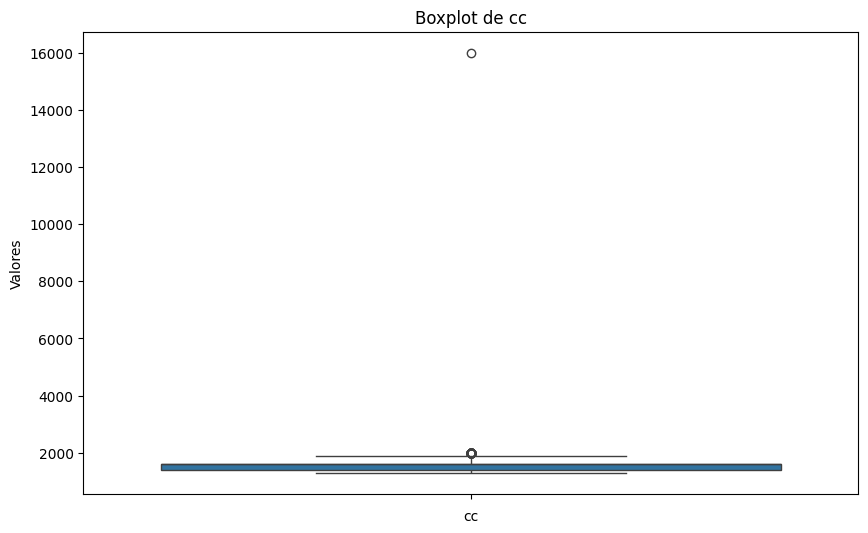

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['cc'])
plt.title('Boxplot de cc')
plt.xlabel('cc')
plt.ylabel('Valores')
plt.show()

Tras observar los valores más frecuentes de la variable 'cc' durante el análisis exploratorio, identificamos que el valor 16000 es muy probablemente un error de carga o tipeo. Por ello, optamos por corregirlo para mantener la coherencia del conjunto de datos.

In [54]:
df.loc[df['cc'] == 16000, 'cc'] = 1600

Verificamos que se haya corregido

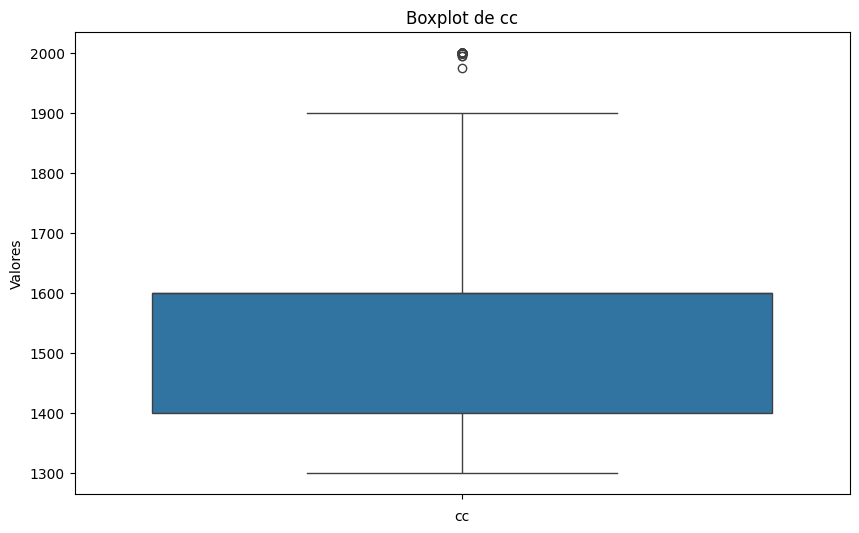

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['cc'])
plt.title('Boxplot de cc')
plt.xlabel('cc')
plt.ylabel('Valores')
plt.show()

Vemos nuevamente los graficos de las variables que estuvimos trabajando

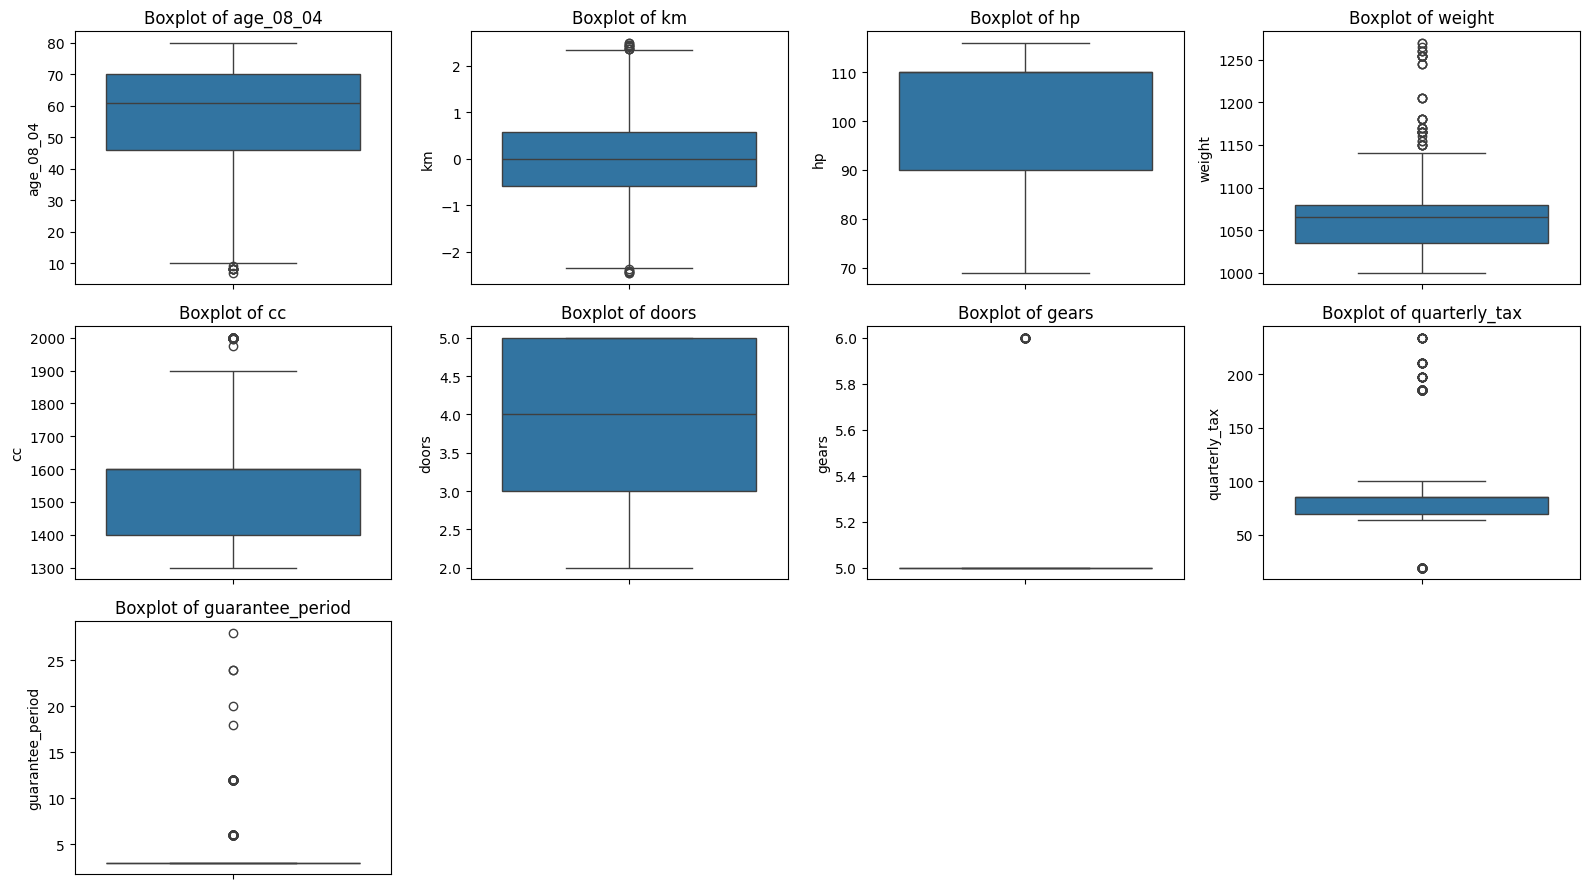

In [56]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']

numeric_features = [col for col in boxplots]
n = len(numeric_features)
n_cols = 4
n_rows = math.ceil(n / n_cols)

    # 🔹 Boxplots
plt.figure(figsize=(4 * n_cols, 3 * n_rows))
for i, column in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()
plt.close()

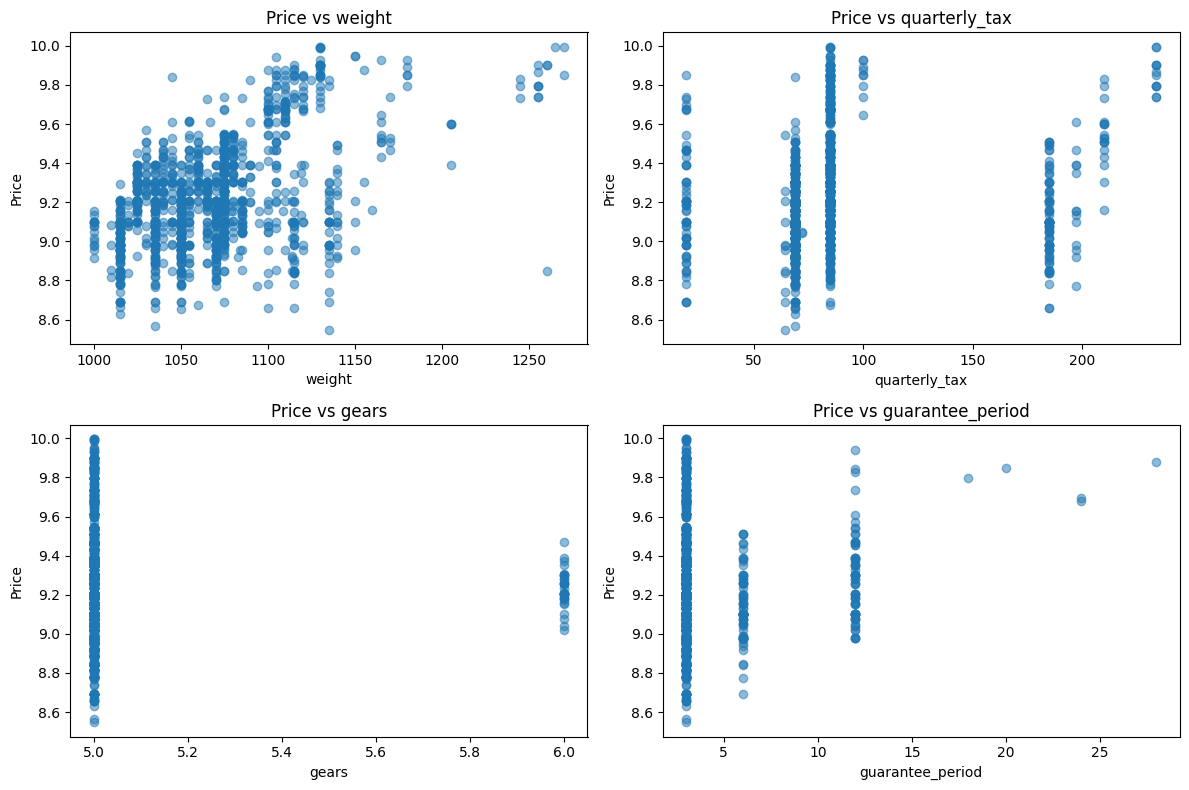

In [57]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

# Crear scatter plots para cada variable
n = len(variables_continuas_scatter)
n_cols = 2
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(12, 4 * n_rows))
for i, var in enumerate(variables_continuas_scatter):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(df[var], df['price'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.title(f'Price vs {var}')
    plt.tight_layout()
plt.show()
plt.close()

Vemos las dimensiones del dataset luego de la limpieza de outliers

In [58]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1376, 35)


Una vez que tenemos el dataset limpio podemos empezar la ejecucion de la regresión lineal y analizar los valores que da para cada variable

# Modelo 1

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1100, 34), (276, 34), (1100,), (276,))

2025/05/30 14:14:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


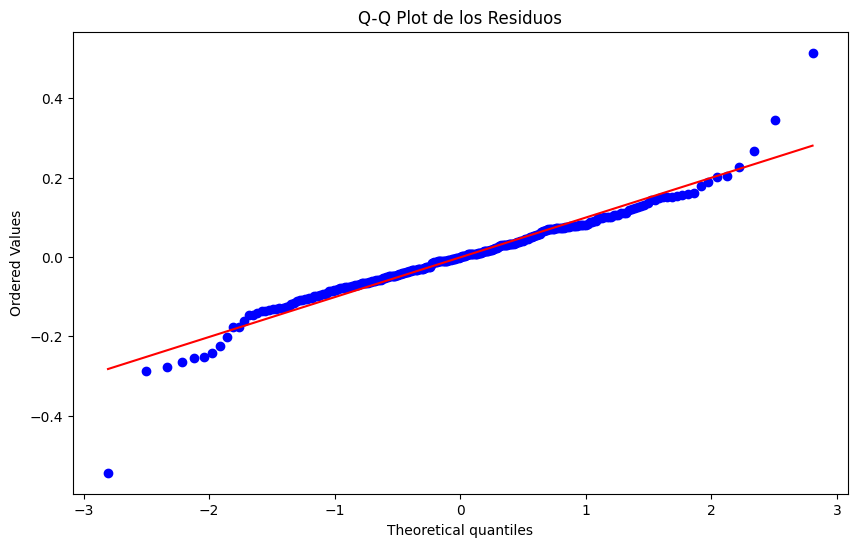

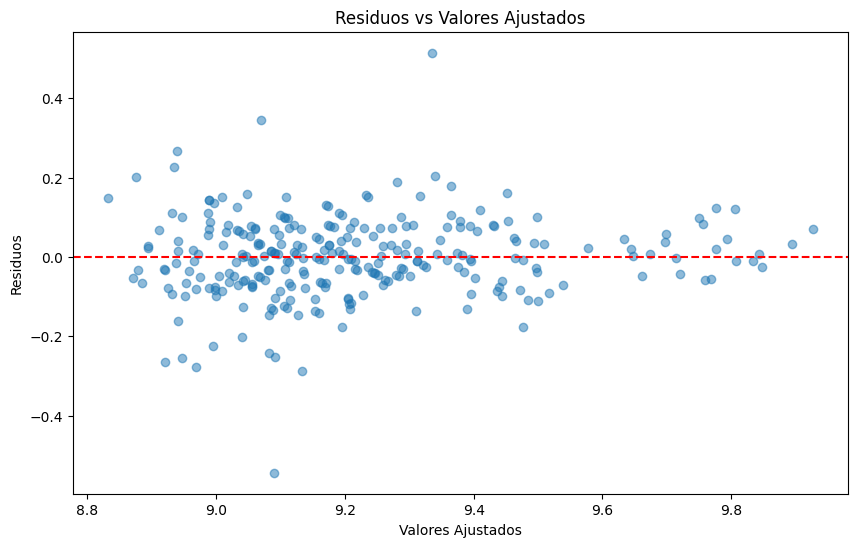

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     243.6
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:14:13   Log-Likelihood:                 1058.8
No. Observations:                1100   AIC:                            -2050.
Df Residuals:                    1066   BIC:                            -1879.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.318e-06   5.88e-08  

In [60]:
with mlflow.start_run(run_name="fs_model1"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    X_test_with_const = sm.add_constant(x_test)
    y_pred_fs = model.predict(X_test_with_const)
    residuals = y_test - y_pred_fs
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot de los Residuos")
    plt.savefig("qq_plot.png")
    mlflow.log_artifact("qq_plot.png")
    plt.show()
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_fs, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.title('Residuos vs Valores Ajustados')
    plt.savefig("residuals_vs_fitted.png")
    mlflow.log_artifact("residuals_vs_fitted.png")
    plt.show()
    plt.close()
    print(model.summary())
    mlflow.end_run()

# Análisis de la regresión y decisión sobre las variables

#### airbag_1 -> t = -0.150 y P>|t| = 0.880         

**Sin relevancia estadística:** El estadístico "t" permite evaluar si el coeficiente asociado a la variable difiere significativamente de cero. En este caso, un valor de -0.150 indica que el coeficiente está muy cerca de cero, lo cual sugiere que la variable `airbag_1` probablemente no aporta de forma relevante a la predicción del modelo. Cuando el valor "t" es bajo, es posible que la variable no tenga un impacto claro y pueda considerarse prescindible.

**Valor p elevado:** El valor "P>|t|" indica la probabilidad de obtener un coeficiente igual o más extremo si la variable no tuviera efecto real. Un valor tan alto como 0.880 implica que no se puede rechazar la hipótesis nula, es decir, no hay suficiente respaldo estadístico para afirmar que la variable tiene un impacto significativo sobre el resultado. En resumen, `airbag_1` no parece influir de manera significativa en el modelo y podría eliminarse sin pérdida sustancial.



| ----------- | ----------- |
| Variable | t value | P>(t) value |
| met_color | -1.621 | 0.105 |
|automatic |        -1.114 |     0.265|
|gears   |           2.347    |  0.019|
|abs    |           0.102|      0.918|
|boardcomputer   |  -2.208 |     0.027|
|airbag_1   |        -0.150  |    0.880|
|airbag_2   |       -0.277  |    0.782|
|central_lock     | 0.893    |  0.372|
|power_steering  |  -0.848  |    0.397|
|radio    |         -0.081 |     0.936|
|mistlamps    |     -0.512  |    0.609|
|sport_model   |     -1.496  |   0.135|
|backseat_divider|  0.580  |    0.562|
|metallic_rim   |    -0.304   |   0.761|
|radio_cassette   |  -0.011 |     0.991 |
|tow_bar         |  -1.166  |    0.244 |

También eliminamos las variables mfg_month y mfg_year porque age_08_04 nos proveé la antiguedad del vehiculo y tener los años y meses de manufactura es redundante, ademas el t value de age es mucho mayor (-23.935), por lo tanto decidimos quedarnos con age.

# Comienzo nuevo modelo - MODELO 2

In [61]:
columns_to_delete = ['met_color', 'automatic', 'gears', 'abs', 'boardcomputer', 'airbag_1', 'airbag_2', 'central_lock', 'power_steering','radio', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim','radio_cassette', 'tow_bar', 'mfg_month', 'mfg_year']

df2 = df.drop(columns=columns_to_delete, axis=1)
df2 = pd.DataFrame(df2)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(['price'], axis=1), df2.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1100, 16), (276, 16), (1100,), (276,))

In [63]:
#Segunda ejecución de una regresión con todas las variables.
with mlflow.start_run(run_name="fs_model2"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    print(model.summary())
    mlflow.end_run()

2025/05/30 14:14:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     459.6
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:14:26   Log-Likelihood:                 1008.1
No. Observations:                1100   AIC:                            -1982.
Df Residuals:                    1083   BIC:                            -1897.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1252      0.162  

Vamos a utilizar el mapa de correlaciones junto con los valores anteriores para decidir si está bien eliminar una variable o no

<Axes: title={'center': 'Mapa de Correlaciones'}>

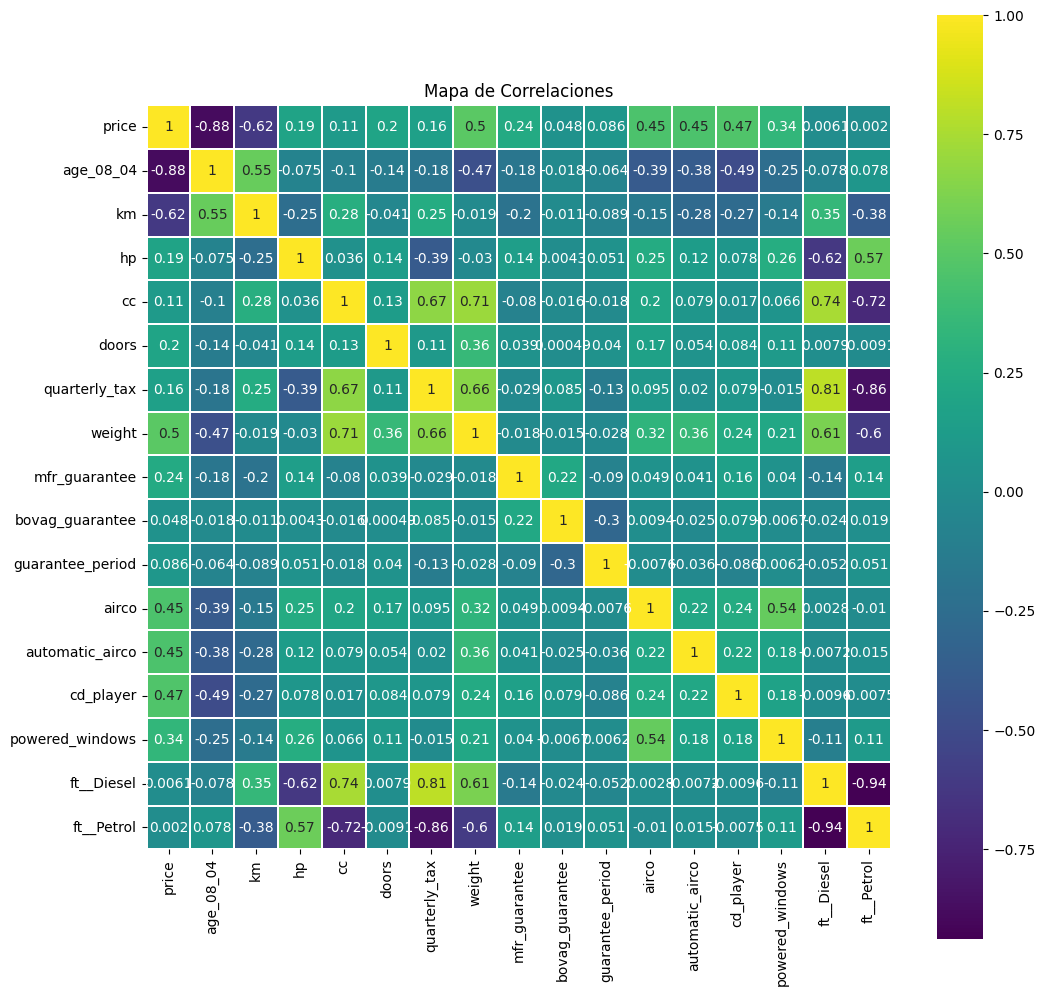

In [64]:
plt.figure(figsize=(12,12))
plt.title("Mapa de Correlaciones")
corr = df2.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap=plt.cm.viridis, linewidths=0.1, linecolor="white", square=True)

Siguiendo esta linea las variables a eliminar son:
Los t value de 2,XX que a su vez poseian un P value malo.

| ----------- | ----------- |
|Variable   |       t value  |   P>(t) value|
| bovag_guarantee |    2.048  |    0.041|
|cd_player   |        2.404   |    0.016|

# Comienzo nuevo modelo - MODELO 3

In [65]:
columns_to_delete = [ 'bovag_guarantee', 'cd_player']
df3 = df2.drop(columns=columns_to_delete, axis=1)
df3 = pd.DataFrame(df3)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop(['price'], axis=1), df3.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1100, 14), (276, 14), (1100,), (276,))

In [67]:
#Tercera ejecución de una regresión con todas las variables.
with mlflow.start_run(run_name="fs_model3"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    print(model_fs.summary())
    mlflow.end_run()

2025/05/30 14:14:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:14:42   Log-Likelihood:                 1049.3
No. Observations:                1132   AIC:                            -2031.
Df Residuals:                    1098   BIC:                            -1860.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.491e-06   4.82e-08  

In [68]:
print(f'Dimensiones del dataset: {df3.shape}')

Dimensiones del dataset: (1376, 15)


# Analisis de Valores Ajustados vs Residuales

Graficamos los residuos

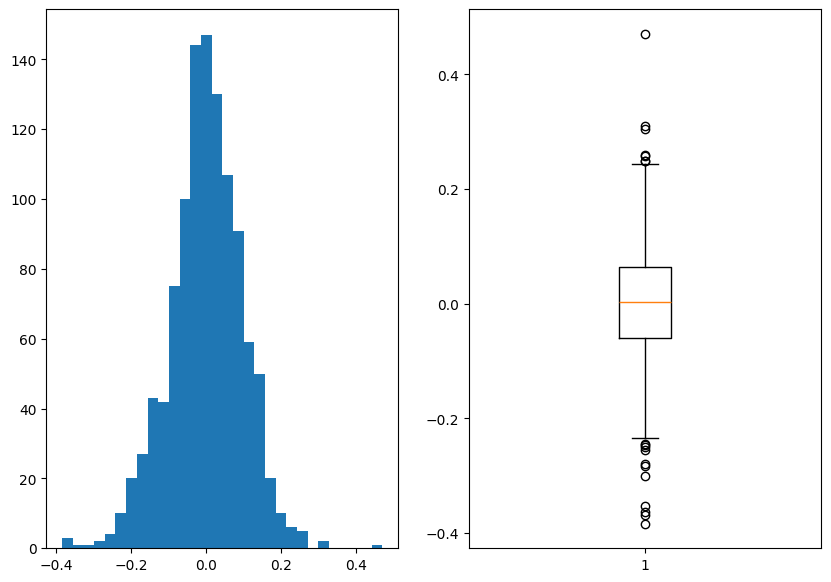

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

El grafico de los residuos se asemeja a una distribución normal

Realizamos un grafico de dispersion

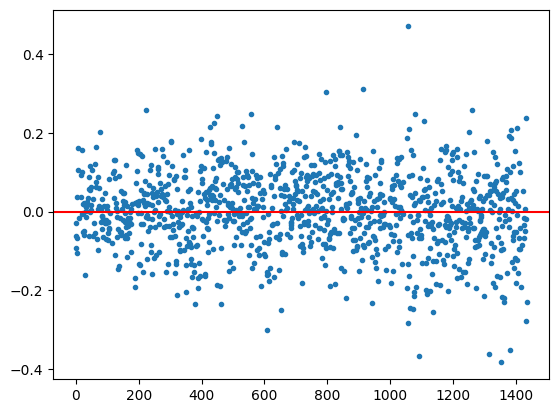

In [70]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

No se logra apreciar ningun patron en la dispersion de los residuos, se puede apreciar una dispersion aleatoria por lo tanto podemos decir que no hay sesgo y poseemos homocedasticidad

Graficamos el residual plot

Text(0, 0.5, 'Residuals')

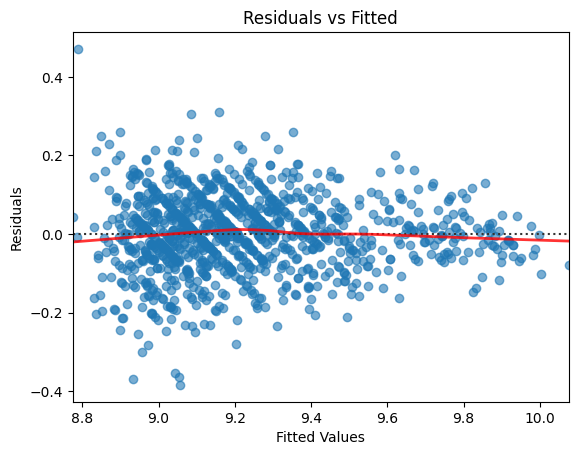

In [71]:
# También conocido como "Residual Plot"
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

Se logra apreciar como la curva intenta mantenerse en el 0 pero posee algunos puntos de apalancamiento que la curvan, se ve claramente 1 punto mayor a 0.4

Graficamos el QQ-Plot

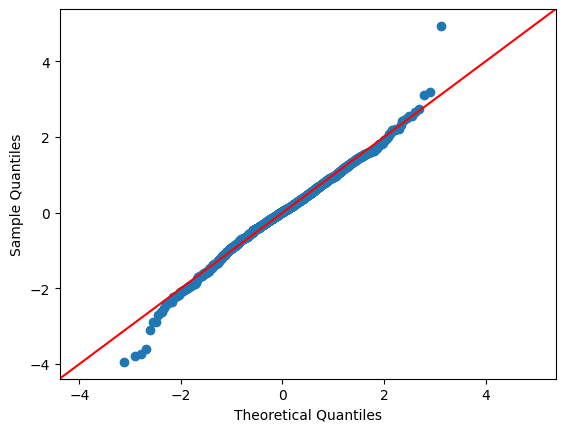

In [72]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Se puede apreciar como la mayoria de los residuos se distribuyen normalmente porque estan encima de la recta pero el grafico tambien muestra una curvatura en las colas de la distribución lo que indica asimetria

Graficamos el Leverage Plot

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

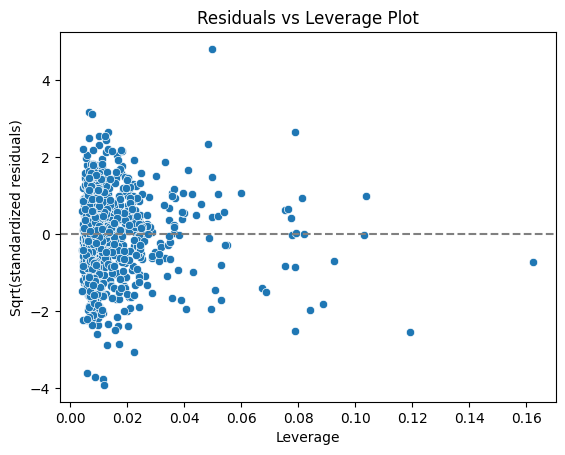

In [73]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

Vemos que hay muchos puntos influyentes en los residuos es necesario considerar si eliminarlos o no

Vamos a analizar como quedaria el modelo y los graficos de residuos sin el residuo mas alejados, es decir, el que está por encima a 0.4

In [74]:
df_out = df3
df_out['residuals'] = residuals
outliers = df_out[(df_out['residuals'] > 0.4) | (df_out['residuals'] < -0.4)]
print(outliers)

         price  age_08_04        km  hp    cc  doors  quarterly_tax  weight  \
1058  9.259226         77  2.315258  72  2000      5             64    1135   

      mfr_guarantee  guarantee_period  airco  automatic_airco  \
1058              0                 3      0                0   

      powered_windows  ft__Diesel  ft__Petrol  residuals  
1058                0           1           0      0.471  


Estos 3 son los registros correspondientes a los residuos mencionados anteriormente

Procedemos a crear un dataset sin esos outliers de residuos

In [75]:
print(outliers.index)

Index([1058], dtype='int64')


In [76]:
df_without_out = df3.drop(outliers.index)
df_without_out.drop(columns='residuals', axis=1, inplace=True)
df_without_out.to_csv('ToyotaCorolla_limpio_sin_outliers.csv', index=False)
print(f'Dimensiones del dataset 3: {df3.shape}')
print(f'Dimensiones del dataset 4: {df_without_out.shape}')

Dimensiones del dataset 3: (1376, 16)
Dimensiones del dataset 4: (1375, 15)


In [77]:
x_train, x_test, y_train, y_test = train_test_split(df_without_out.drop(['price'], axis=1), df_without_out.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1100, 14), (275, 14), (1100,), (275,))

In [78]:
with mlflow.start_run(run_name="fs_model"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    print(model_fs.summary())
    mlflow.end_run()

2025/05/30 14:14:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:14:57   Log-Likelihood:                 1049.3
No. Observations:                1132   AIC:                            -2031.
Df Residuals:                    1098   BIC:                            -1860.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.491e-06   4.82e-08  

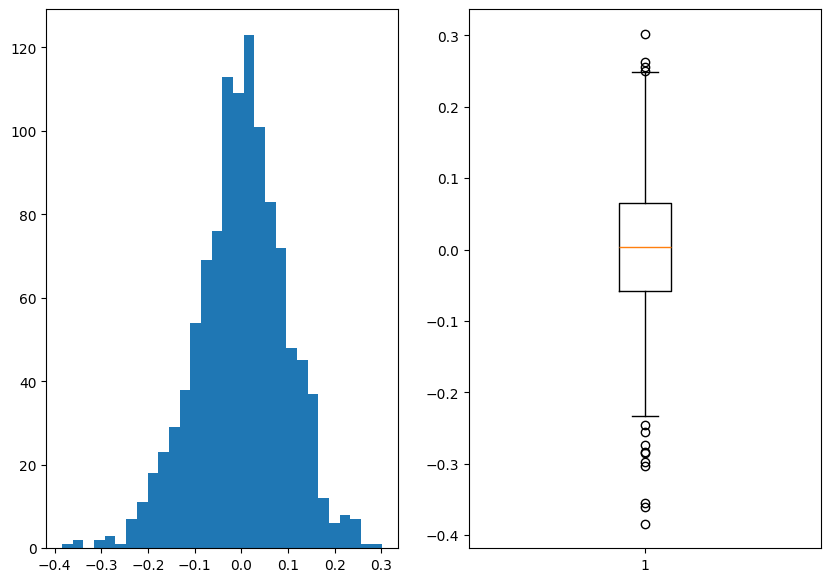

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

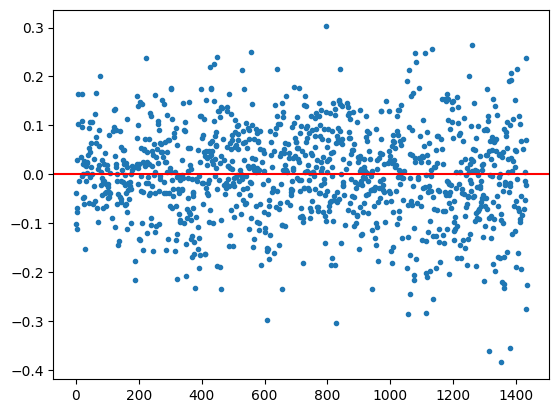

In [80]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

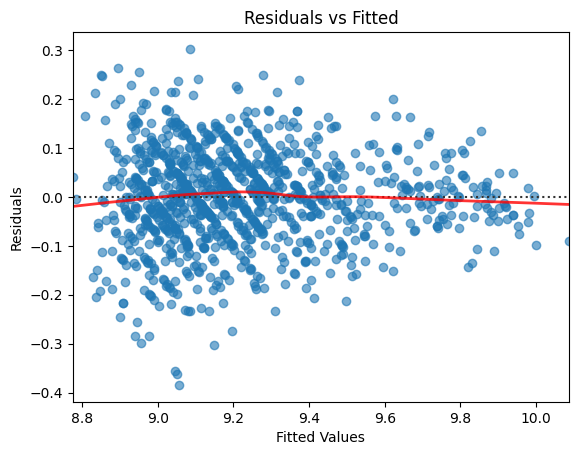

In [81]:
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

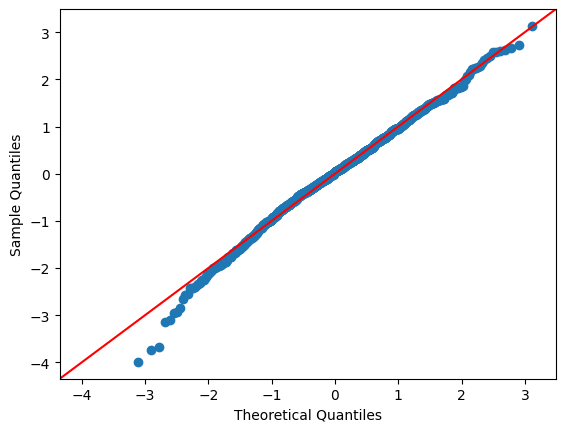

In [82]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

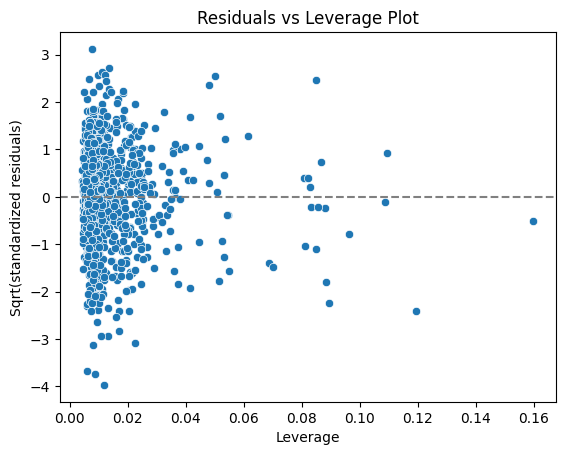

In [83]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

In [84]:
df_out_prueba=df_without_out
df_out_prueba['residuals'] = residuals
outliers_prueba = df_out_prueba[(df_out_prueba['residuals'] < -0.35)]
print(outliers_prueba) 

         price  age_08_04        km   hp    cc  doors  quarterly_tax  weight  \
1313  8.691315         74  0.113728  110  1600      3             69    1050   
1351  8.673513         70 -0.097562   86  1300      3             85    1060   
1382  8.691315         69 -0.294875  110  1600      3             69    1050   

      mfr_guarantee  guarantee_period  airco  automatic_airco  \
1313              1                 3      0                0   
1351              0                 3      0                0   
1382              0                 3      0                0   

      powered_windows  ft__Diesel  ft__Petrol  residuals  
1313                1           0           1  -0.360940  
1351                0           0           1  -0.384175  
1382                0           0           1  -0.355370  


In [85]:
df_without_out_prueba = df_without_out.drop(outliers_prueba.index)
df_without_out_prueba.drop(columns='residuals', axis=1, inplace=True)
df_without_out_prueba.to_csv('ToyotaCorolla_limpio_sin_outliers.csv', index=False)
print(f'Dimensiones del dataset 3: {df_without_out.shape}')
print(f'Dimensiones del dataset 4: {df_without_out_prueba.shape}')

Dimensiones del dataset 3: (1375, 16)
Dimensiones del dataset 4: (1372, 15)


In [86]:
x_train, x_test, y_train, y_test = train_test_split(df_without_out_prueba.drop(['price'], axis=1), df_without_out_prueba.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 14), (275, 14), (1097,), (275,))

In [87]:
with mlflow.start_run(run_name="fs_model"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    print(model_fs.summary())
    mlflow.end_run()

2025/05/30 14:15:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:15:13   Log-Likelihood:                 1049.3
No. Observations:                1132   AIC:                            -2031.
Df Residuals:                    1098   BIC:                            -1860.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.491e-06   4.82e-08  

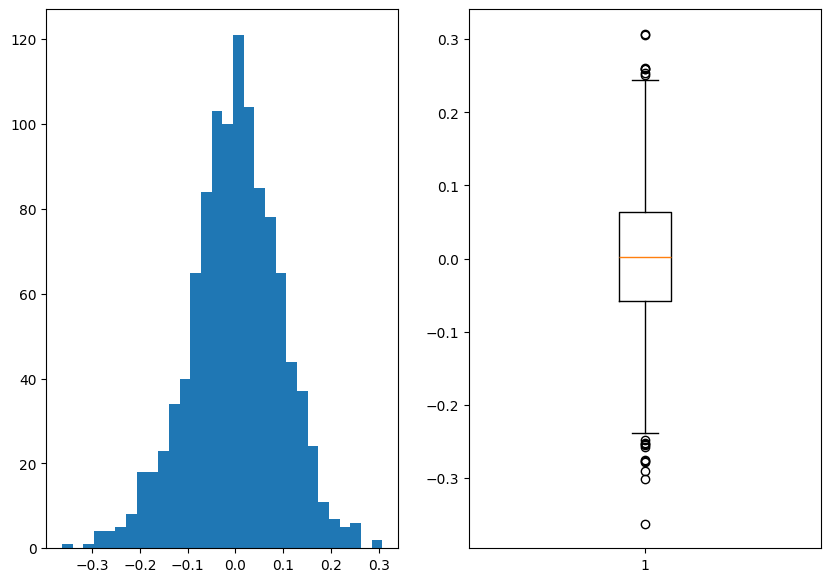

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

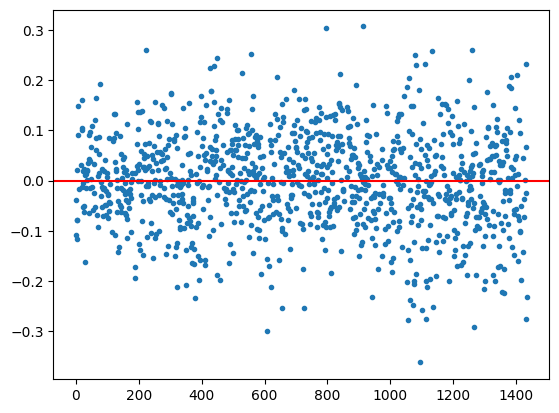

In [89]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

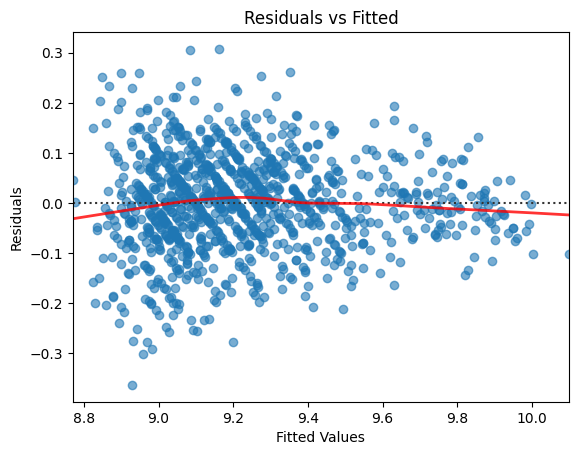

In [90]:
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

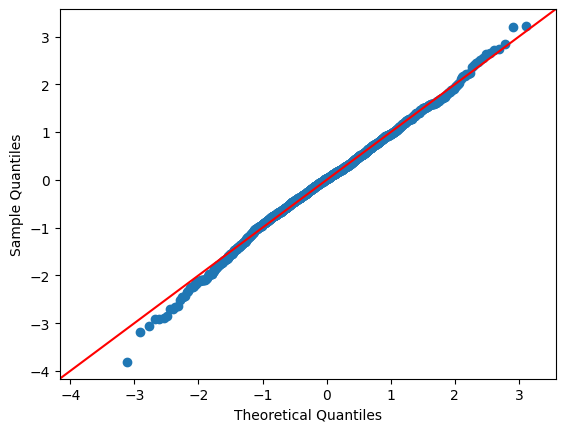

In [91]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

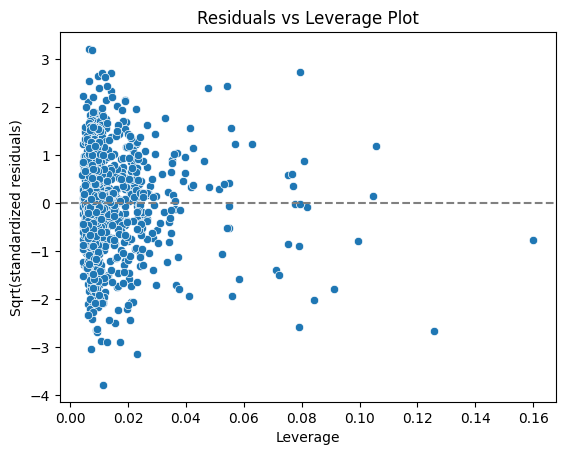

In [92]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

In [93]:
df_out_prueba2 = df_without_out_prueba
df_out_prueba2['residuals'] = residuals
outliers_prueba = df_out_prueba2[(df_out_prueba2['residuals'] > 0.3) | (df_out_prueba2['residuals'] < -0.3)]
print(outliers_prueba) 

         price  age_08_04        km   hp    cc  doors  quarterly_tax  weight  \
609   8.657303         67  2.347399   72  2000      4            185    1100   
796   9.388570         60  0.272458   86  1300      5             69    1035   
913   9.468928         67 -0.170157  110  1600      3             85    1065   
1093  8.566174         72  1.448310  110  1600      4             69    1035   

      mfr_guarantee  guarantee_period  airco  automatic_airco  \
609               0                 3      1                0   
796               0                 3      0                0   
913               0                 3      1                0   
1093              0                 3      1                0   

      powered_windows  ft__Diesel  ft__Petrol  residuals  
609                 0           1           0  -0.300974  
796                 0           0           1   0.305426  
913                 1           0           1   0.307514  
1093                0           0    

In [94]:
df_without_out_prueba2 = df_without_out_prueba.drop(outliers_prueba.index)
df_without_out_prueba2.drop(columns='residuals', axis=1, inplace=True)
df_without_out_prueba2.to_csv('ToyotaCorolla_limpio_sin_outliers.csv', index=False)
print(f'Dimensiones del dataset 3: {df_without_out_prueba.shape}')
print(f'Dimensiones del dataset 4: {df_without_out_prueba2.shape}')

Dimensiones del dataset 3: (1372, 16)
Dimensiones del dataset 4: (1368, 15)


In [95]:
x_train, x_test, y_train, y_test = train_test_split(df_without_out_prueba2.drop(['price'], axis=1), df_without_out_prueba2.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1094, 14), (274, 14), (1094,), (274,))

In [96]:
with mlflow.start_run(run_name="fs_model"):
    model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    print(model_fs.summary())
    mlflow.end_run()

2025/05/30 14:15:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 30 May 2025   Prob (F-statistic):               0.00
Time:                        14:15:28   Log-Likelihood:                 1049.3
No. Observations:                1132   AIC:                            -2031.
Df Residuals:                    1098   BIC:                            -1860.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.491e-06   4.82e-08  

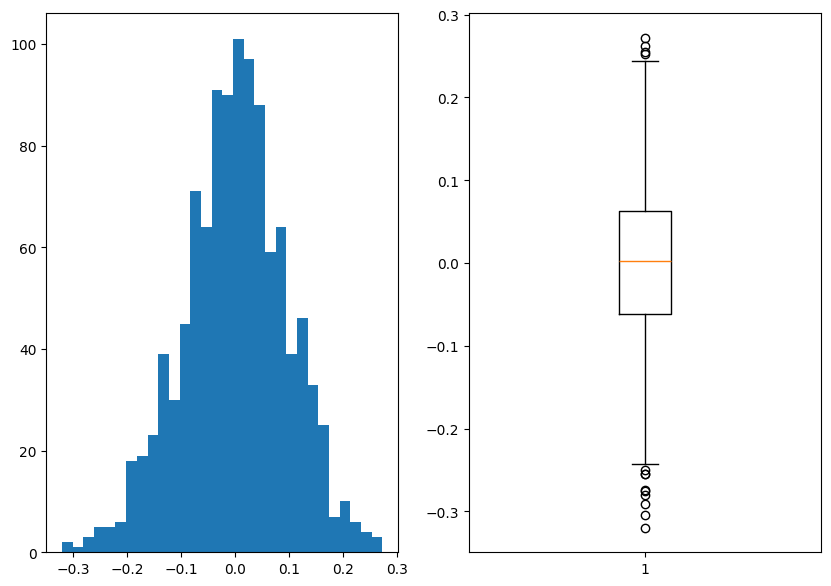

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7))
ax1.hist(model.resid, bins=30)
ax2.boxplot(model.resid)
plt.show()

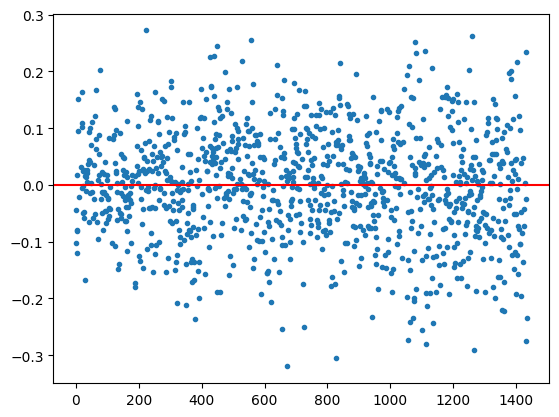

In [98]:
fitted_values = model.fittedvalues
residuals = y_train - fitted_values

fig, ax = plt.subplots()
ax.plot(residuals, marker='.', alpha = 1, linestyle='None')
ax.axhline(y=0, color = 'r')
plt.show()

Text(0, 0.5, 'Residuals')

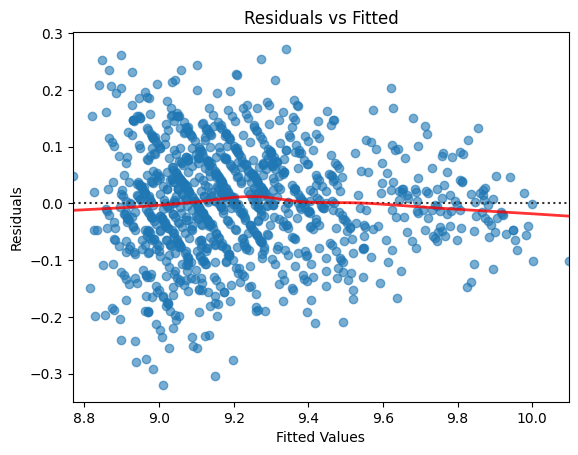

In [99]:
plot = sns.residplot(y=residuals, x=fitted_values, lowess=True,
                     scatter_kws={'alpha':0.6},
                     line_kws={'color': 'red', 'lw':2, 'alpha':0.8})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted Values')
plot.set_ylabel('Residuals')

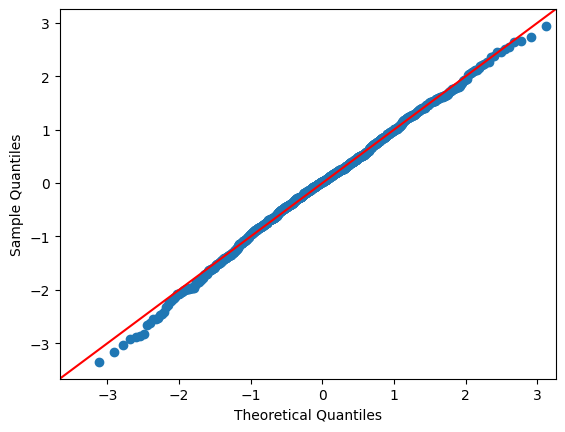

In [100]:
residuals_norm = model.get_influence().resid_studentized_internal
plot = sm.qqplot(residuals_norm, line='45')

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

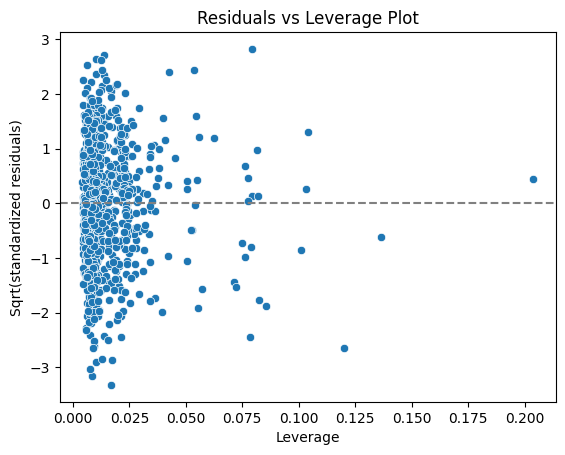

In [101]:
stand_resids = model.resid_pearson

influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots()
sns.scatterplot(x=leverage, y=stand_resids)
ax.axhline(y=0, color='grey', linestyle='dashed')
ax.set_xlabel('Leverage')
ax.set_ylabel('Sqrt(standardized residuals)')
ax.set_title('Residuals vs Leverage Plot')

Decidimos quedarnos con el penultimo modelo "df_without_out_prueba" porque el ultimo empeoro los valores de las metricas. 

In [102]:
df_without_out_prueba.drop(columns='residuals', axis=1, inplace=True)
df_without_out_prueba.isna().sum().sort_values(ascending=False)


price               0
age_08_04           0
km                  0
hp                  0
cc                  0
doors               0
quarterly_tax       0
weight              0
mfr_guarantee       0
guarantee_period    0
airco               0
automatic_airco     0
powered_windows     0
ft__Diesel          0
ft__Petrol          0
dtype: int64

In [103]:


# Definir X e y
X = df.drop(columns=['price'])
y = df['price']

X.columns

# Split de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, **split_param)
# Definir rangos de alpha a probar
alphas = np.logspace(-4, 2, 50)
    
# Ridge con Cross-Validation
with mlflow.start_run(run_name="ridge_model"):
    ridge_cv = RidgeCV(alphas=alphas, cv=5)
    ridge_cv.fit(x_train, y_train)
    
    # Predictions
    y_pred_ridge_train = ridge_cv.predict(x_train)
    y_pred_ridge_test = ridge_cv.predict(x_test)
    
    # Test metrics
    ridge_rmse_test = mean_squared_error(y_test, y_pred_ridge_test) ** 0.5
    ridge_mse_test = mean_squared_error(y_test, y_pred_ridge_test)
    ridge_mae_test = np.mean(np.abs(y_test - y_pred_ridge_test))
    ridge_r2_test = r2_score(y_test, y_pred_ridge_test)
    
    # Train metrics
    ridge_rmse_train = mean_squared_error(y_train, y_pred_ridge_train) ** 0.5
    ridge_mse_train = mean_squared_error(y_train, y_pred_ridge_train)
    ridge_mae_train = np.mean(np.abs(y_train - y_pred_ridge_train))
    ridge_r2_train = r2_score(y_train, y_pred_ridge_train)
    
    # Log metrics
    mlflow.log_metric("best_alpha", ridge_cv.alpha_)
    mlflow.log_metric("r2_test", ridge_r2_test)
    mlflow.log_metric("rmse_test", ridge_rmse_test)
    mlflow.log_metric("mse_test", ridge_mse_test)
    mlflow.log_metric("mae_test", ridge_mae_test)
    mlflow.log_metric("r2_train", ridge_r2_train)
    mlflow.log_metric("rmse_train", ridge_rmse_train)
    mlflow.log_metric("mse_train", ridge_mse_train)
    mlflow.log_metric("mae_train", ridge_mae_train)
    
    print("\nRidgeCV Metrics:")
    print(f'Best alpha: {ridge_cv.alpha_:.4f}')
    print("\nTest Metrics:")
    print(f'R2: {ridge_r2_test:.4f}')
    print(f'RMSE: {ridge_rmse_test:.4f}')
    print(f'MSE: {ridge_mse_test:.4f}')
    print(f'MAE: {ridge_mae_test:.4f}')
    print("\nTrain Metrics:")
    print(f'R2: {ridge_r2_train:.4f}')
    print(f'RMSE: {ridge_rmse_train:.4f}')
    print(f'MSE: {ridge_mse_train:.4f}')
    print(f'MAE: {ridge_mae_train:.4f}')

# Lasso con Cross-Validation
with mlflow.start_run(run_name="lasso_model"):
    lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
    lasso_cv.fit(x_train, y_train)
    
    # Predictions
    y_pred_lasso_train = lasso_cv.predict(x_train)
    y_pred_lasso_test = lasso_cv.predict(x_test)
    
    # Test metrics
    lasso_rmse_test = mean_squared_error(y_test, y_pred_lasso_test) ** 0.5
    lasso_mse_test = mean_squared_error(y_test, y_pred_lasso_test)
    lasso_mae_test = np.mean(np.abs(y_test - y_pred_lasso_test))
    lasso_r2_test = r2_score(y_test, y_pred_lasso_test)
    
    # Train metrics
    lasso_rmse_train = mean_squared_error(y_train, y_pred_lasso_train) ** 0.5
    lasso_mse_train = mean_squared_error(y_train, y_pred_lasso_train)
    lasso_mae_train = np.mean(np.abs(y_train - y_pred_lasso_train))
    lasso_r2_train = r2_score(y_train, y_pred_lasso_train)
    
    # Log metrics
    mlflow.log_metric("best_alpha", lasso_cv.alpha_)
    mlflow.log_metric("r2_test", lasso_r2_test)
    mlflow.log_metric("rmse_test", lasso_rmse_test)
    mlflow.log_metric("mse_test", lasso_mse_test)
    mlflow.log_metric("mae_test", lasso_mae_test)
    mlflow.log_metric("r2_train", lasso_r2_train)
    mlflow.log_metric("rmse_train", lasso_rmse_train)
    mlflow.log_metric("mse_train", lasso_mse_train)
    mlflow.log_metric("mae_train", lasso_mae_train)
    
    print("\nLassoCV Metrics:")
    print(f'Best alpha: {lasso_cv.alpha_:.4f}')
    print("\nTest Metrics:")
    print(f'R2: {lasso_r2_test:.4f}')
    print(f'RMSE: {lasso_rmse_test:.4f}')
    print(f'MSE: {lasso_mse_test:.4f}')
    print(f'MAE: {lasso_mae_test:.4f}')
    print("\nTrain Metrics:")
    print(f'R2: {lasso_r2_train:.4f}')
    print(f'RMSE: {lasso_rmse_train:.4f}')
    print(f'MSE: {lasso_mse_train:.4f}')
    print(f'MAE: {lasso_mae_train:.4f}')


RidgeCV Metrics:
Best alpha: 7.9060

Test Metrics:
R2: 0.8406
RMSE: 0.1030
MSE: 0.0106
MAE: 0.0745

Train Metrics:
R2: 0.8824
RMSE: 0.0926
MSE: 0.0086
MAE: 0.0720
🏃 View run ridge_model at: http://localhost:5000/#/experiments/477998100587876179/runs/87d2f31516bf4390bd52a3e18f8f3dc3
🧪 View experiment at: http://localhost:5000/#/experiments/477998100587876179

LassoCV Metrics:
Best alpha: 0.0003

Test Metrics:
R2: 0.8418
RMSE: 0.1026
MSE: 0.0105
MAE: 0.0744

Train Metrics:
R2: 0.8824
RMSE: 0.0926
MSE: 0.0086
MAE: 0.0719
🏃 View run lasso_model at: http://localhost:5000/#/experiments/477998100587876179/runs/79e66173288545f7b2ce2382b1f7d078
🧪 View experiment at: http://localhost:5000/#/experiments/477998100587876179


2025/05/30 14:16:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '47b22a5fa89b4b7795893f03d4ff196d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/30 14:16:00 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2025/05/30 14:16:00 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


🏃 View run incongruous-dog-798 at: http://localhost:5000/#/experiments/477998100587876179/runs/47b22a5fa89b4b7795893f03d4ff196d
🧪 View experiment at: http://localhost:5000/#/experiments/477998100587876179


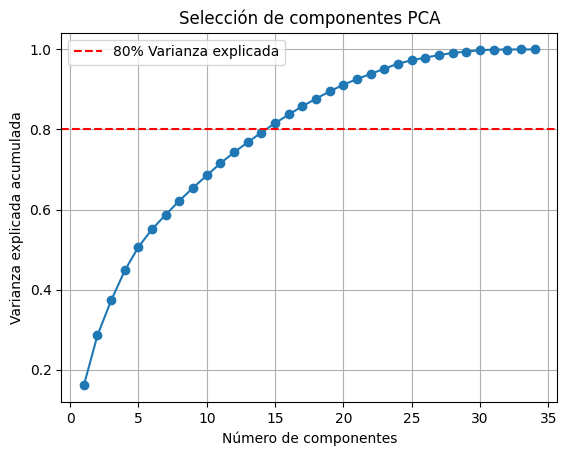

Componentes seleccionados para explicar el 80% de la varianza: 15

PCR Metrics:

Test Metrics:
R2: 0.8133
RMSE: 0.1115
MSE: 0.0124
MAE: 0.0849

Train Metrics:
R2: 0.8458
RMSE: 0.1061
MSE: 0.0113
MAE: 0.0835
🏃 View run pca_model at: http://localhost:5000/#/experiments/477998100587876179/runs/3a53e41e9ad6490e9e0a963a5b9452cc
🧪 View experiment at: http://localhost:5000/#/experiments/477998100587876179


In [104]:

# Analizar varianza explicada acumulada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA().fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker='o')
plt.axhline(0.80, color='r', linestyle='--', label='80% Varianza explicada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Selección de componentes PCA')
plt.legend()
plt.grid(True)
plt.show()

# Elegir el número de componentes que explique ~80% de la varianza
n_components = np.argmax(explained_var >= 0.80) + 1
print(f'Componentes seleccionados para explicar el 80% de la varianza: {n_components}')

# PCR con el número óptimo de componentes
with mlflow.start_run(run_name="pca_model"):
    pcr = make_pipeline(StandardScaler(), PCA(n_components=n_components), RidgeCV(alphas=alphas, cv=5))
    pcr.fit(x_train, y_train)
    
    # Predictions
    y_pred_pcr_train = pcr.predict(x_train)
    y_pred_pcr_test = pcr.predict(x_test)
    
    # Test metrics
    pcr_rmse_test = mean_squared_error(y_test, y_pred_pcr_test) ** 0.5
    pcr_mse_test = mean_squared_error(y_test, y_pred_pcr_test)
    pcr_mae_test = np.mean(np.abs(y_test - y_pred_pcr_test))
    pcr_r2_test = r2_score(y_test, y_pred_pcr_test)
    
    # Train metrics
    pcr_rmse_train = mean_squared_error(y_train, y_pred_pcr_train) ** 0.5
    pcr_mse_train = mean_squared_error(y_train, y_pred_pcr_train)
    pcr_mae_train = np.mean(np.abs(y_train - y_pred_pcr_train))
    pcr_r2_train = r2_score(y_train, y_pred_pcr_train)
    
    # Log metrics
    mlflow.log_metric("n_components", n_components)
    mlflow.log_metric("r2_test", pcr_r2_test)
    mlflow.log_metric("rmse_test", pcr_rmse_test)
    mlflow.log_metric("mse_test", pcr_mse_test)
    mlflow.log_metric("mae_test", pcr_mae_test)
    mlflow.log_metric("r2_train", pcr_r2_train)
    mlflow.log_metric("rmse_train", pcr_rmse_train)
    mlflow.log_metric("mse_train", pcr_mse_train)
    mlflow.log_metric("mae_train", pcr_mae_train)
    
    print("\nPCR Metrics:")
    print("\nTest Metrics:")
    print(f'R2: {pcr_r2_test:.4f}')
    print(f'RMSE: {pcr_rmse_test:.4f}')
    print(f'MSE: {pcr_mse_test:.4f}')
    print(f'MAE: {pcr_mae_test:.4f}')
    print("\nTrain Metrics:")
    print(f'R2: {pcr_r2_train:.4f}')
    print(f'RMSE: {pcr_rmse_train:.4f}')
    print(f'MSE: {pcr_mse_train:.4f}')
    print(f'MAE: {pcr_mae_train:.4f}')

### Conclusión

El **primer modelo** incluía muchas variables sin una selección ni limpieza adecuada. Esto generó:

- Coeficientes poco significativos (valores *p* altos).
- Posible multicolinealidad.
- Modelo más difícil de interpretar y menos robusto.

Tras aplicar **limpieza de datos y selección de variables**, el **último modelo** mostró mejoras claras:

- Mayor **R² ajustado**, indicando mejor capacidad explicativa.
- Menor cantidad de variables, facilitando la interpretación.
- Variables con alta significancia estadística.

**Resumen:** El modelo final es más simple, preciso y confiable gracias al preprocesamiento y la optimización de variables.
Por que el auto vale lo que vale segun el analisis que hicimos, que features elegimos, porque cada una, cuales son las variables de rendimiento (MSE MAE), etc.

### Ridge Regression

El modelo de regresión Ridge utilizó un valor óptimo de alpha de **7.9060**, lo que indica una regularización moderada para controlar la varianza. Logró un **R² en test de 0.8406**, con un **RMSE de 0.1030** y un **MAE de 0.0745**, mostrando un buen desempeño general. En entrenamiento, obtuvo un R² de 0.8824, lo que sugiere que el modelo generaliza bien sin caer en overfitting. Es una opción robusta cuando se quiere mantener todas las variables y evitar colinealidad.


### Lasso Regression

La regresión Lasso, con un alpha óptimo de **0.0003**, alcanzó el **mejor desempeño predictivo** entre los modelos, con un **R² de 0.8418**, un **RMSE de 0.1026**, y un **MSE similar al de Ridge**. Su principal ventaja es que además de regularizar, **realiza selección automática de variables**, eliminando aquellas con poco aporte al modelo. Esto lo convierte en una excelente opción cuando se busca **precisión y simplicidad** al mismo tiempo.


### PCA + Regresión Lineal (PCR)

El modelo basado en Análisis de Componentes Principales utilizó **15 componentes** que explican el **80% de la varianza total**. Sin embargo, obtuvo un **R² test de 0.8133**, con **RMSE de 0.1115** y **MAE de 0.0849**, lo que lo posiciona como el menos preciso de los tres modelos. Aunque PCR es útil para reducir la dimensionalidad y simplificar los datos, en este caso perdió poder predictivo frente a Ridge y Lasso. Su uso se justifica principalmente cuando hay muchas variables altamente correlacionadas o problemas computacionales.
